In [1]:
import os
import numpy as np
import pretty_midi
import matplotlib.pyplot as plt

from train import parse_melody_channel_txt

In [2]:
def verify_channel_validity_by_demo(txt_path, midi_dir, start_sec = 20, end_sec = 60, fs = 100, frame_hop = 5):
    filenames, channels = parse_melody_channel_txt(txt_path)
    for i_file in range(len(filenames)):
        midi_path = os.path.join(midi_dir, filenames[i_file])
        if os.path.exists(midi_path):
            midi_feats = pretty_midi.PrettyMIDI(midi_path)
            start_frame = int(start_sec*fs)
            end_frame = int(end_sec*fs)
            if channels[i_file] < len(midi_feats.instruments):
                piano_roll_demo = midi_feats.instruments[channels[i_file]].get_piano_roll(fs=fs)[
                    :,start_frame:end_frame:frame_hop
                ]
                midi_instrument_id = midi_feats.instruments[channels[i_file]].program
                instrument_type = instrument_midi_id_to_type_string(midi_instrument_id)
                if piano_roll_demo.shape[1] > fs / frame_hop * 5: # at least 5 seconds melody
                    plt.matshow(piano_roll_demo, origin="lower")
                    plt.title(
                        f"{filenames[i_file]}; channel id {channels[i_file]}; instrument midi id {midi_instrument_id}; instrument type {instrument_type}"
                    )
                    plt.xticks(
                        np.arange(0, (end_frame-start_frame)/frame_hop, step=(end_frame-start_frame)/frame_hop/8), 
                        np.arange(start_sec, end_sec, step=(end_sec-start_sec)/8)
                    )
                else:
                    print(f"The melody channel given in {txt_path} is insufficient for midi file {filenames[i_file]}")
            else:
                print(f"The melody channel given in {txt_path} is invlid for midi file {filenames[i_file]}")

In [3]:
import warnings
warnings.filterwarnings('ignore')

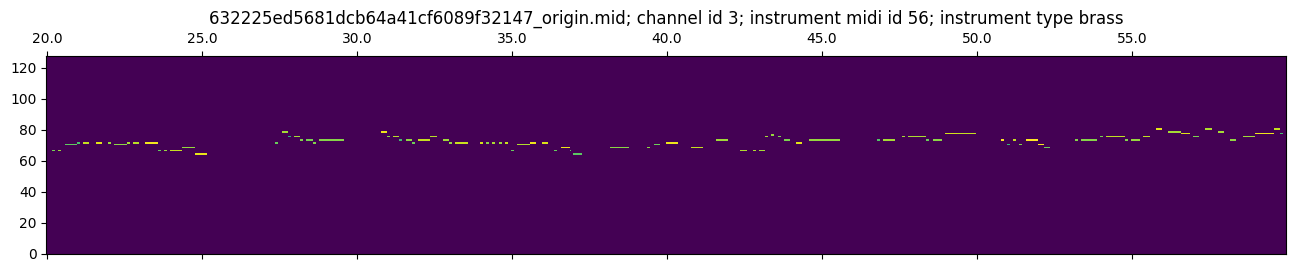

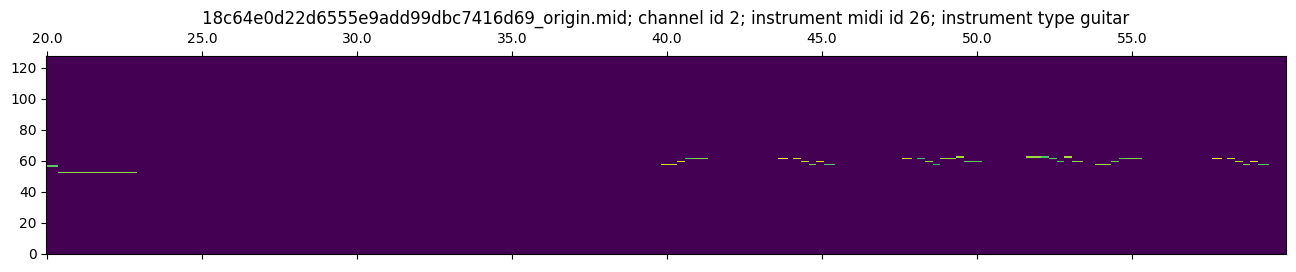

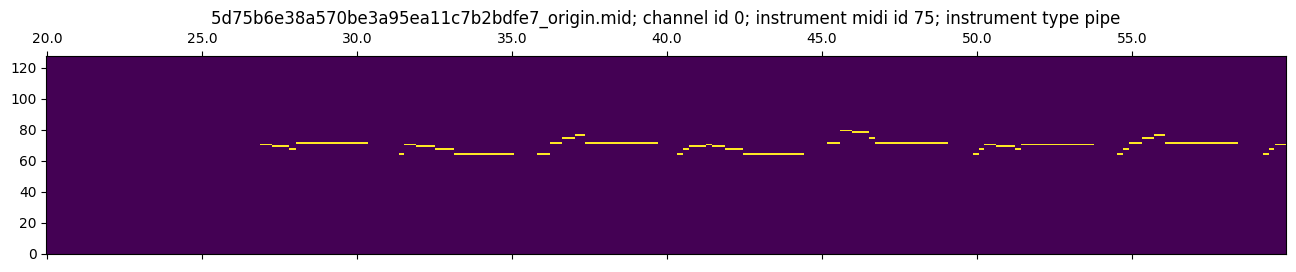

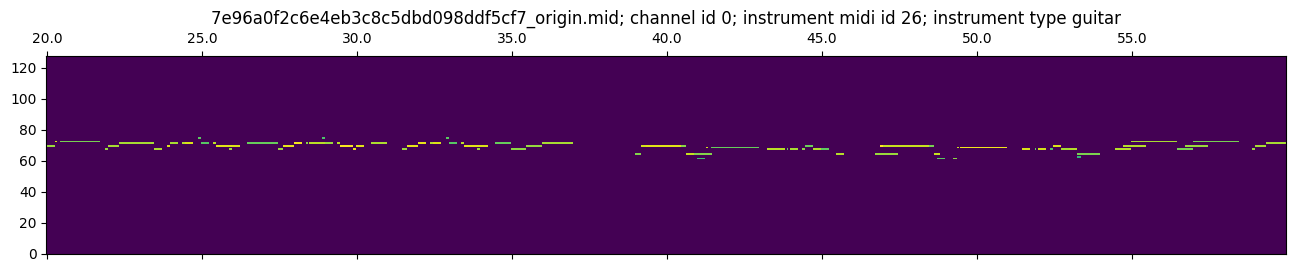

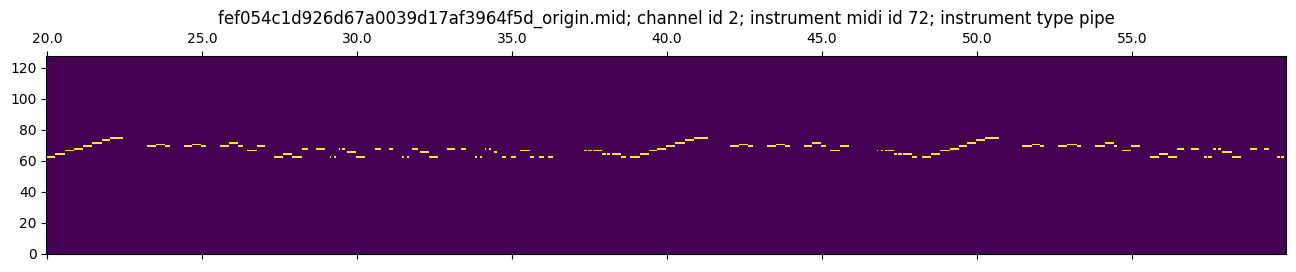

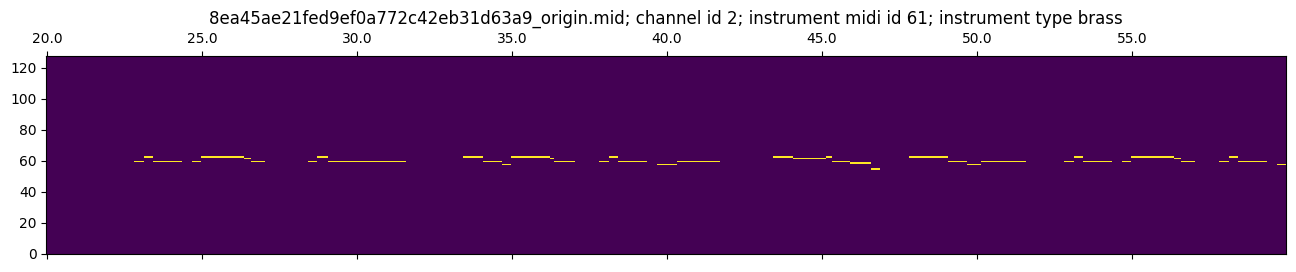

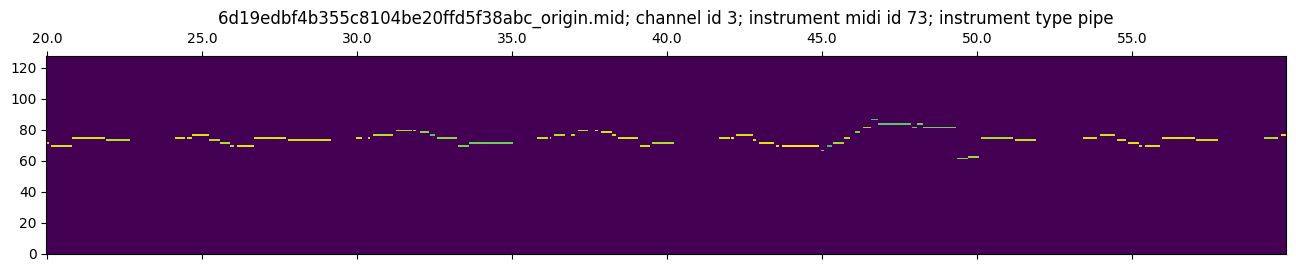

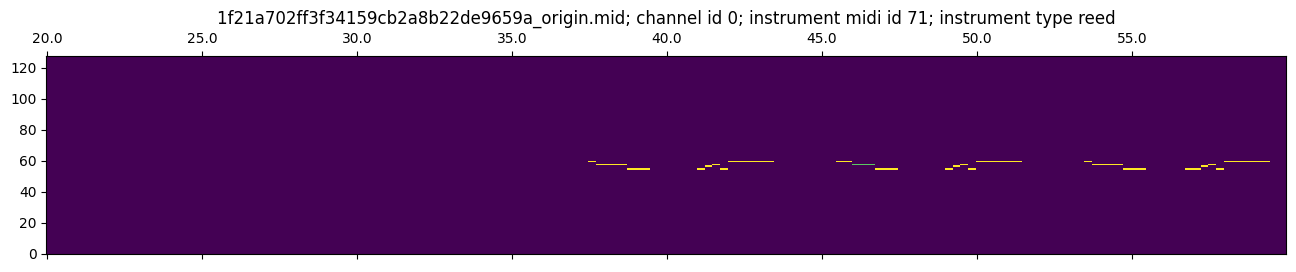

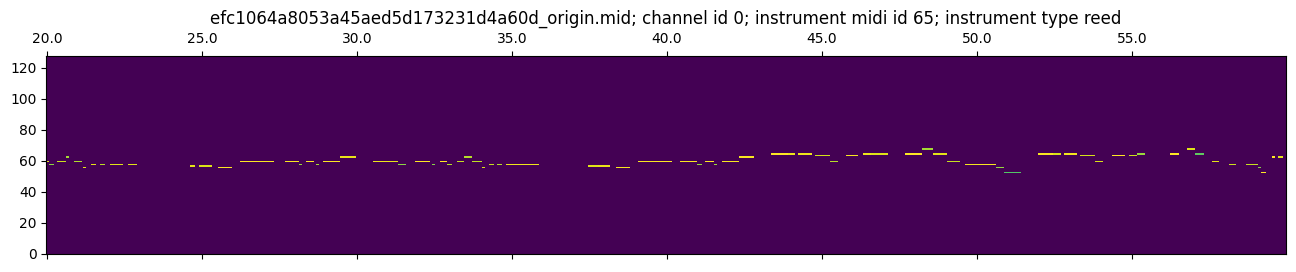

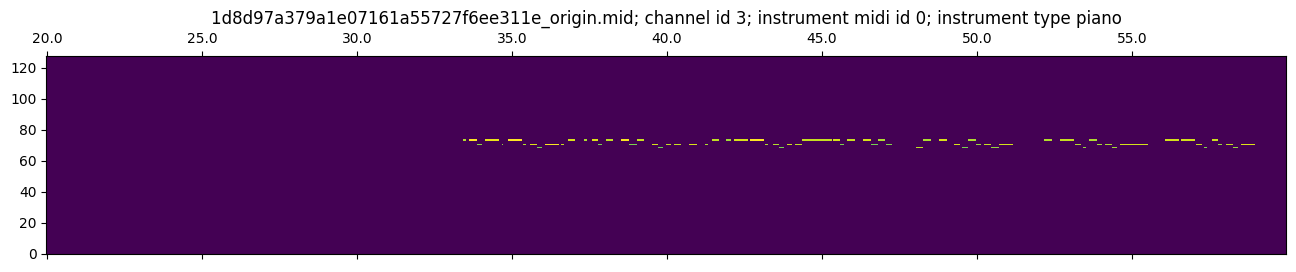

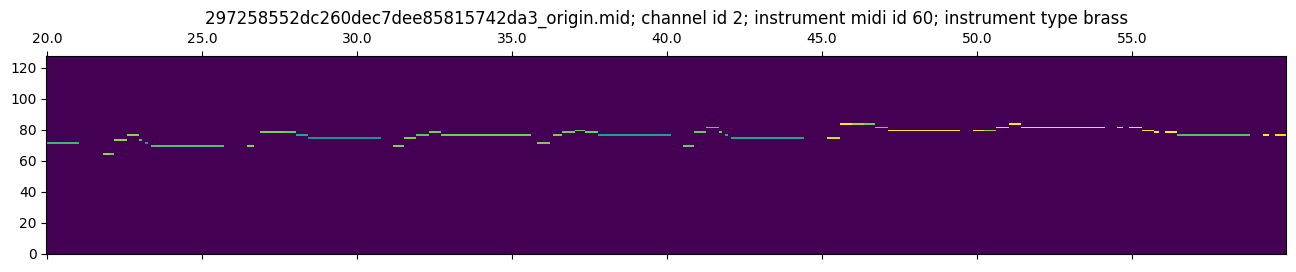

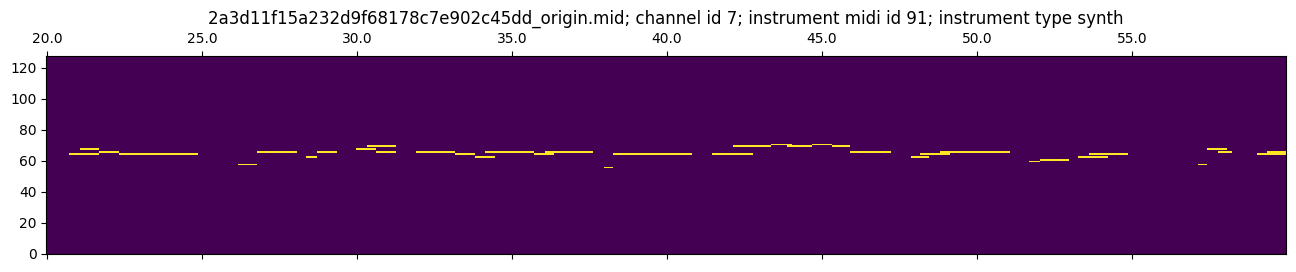

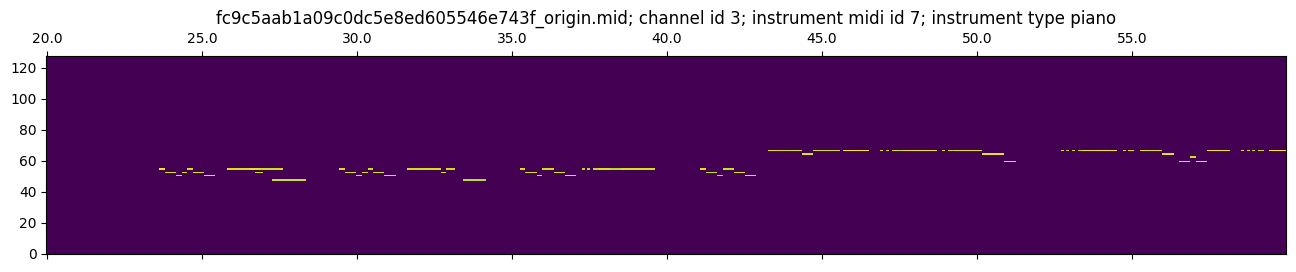

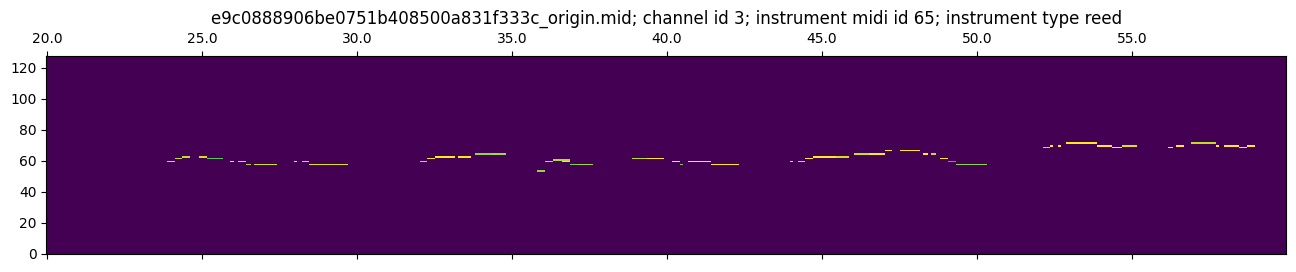

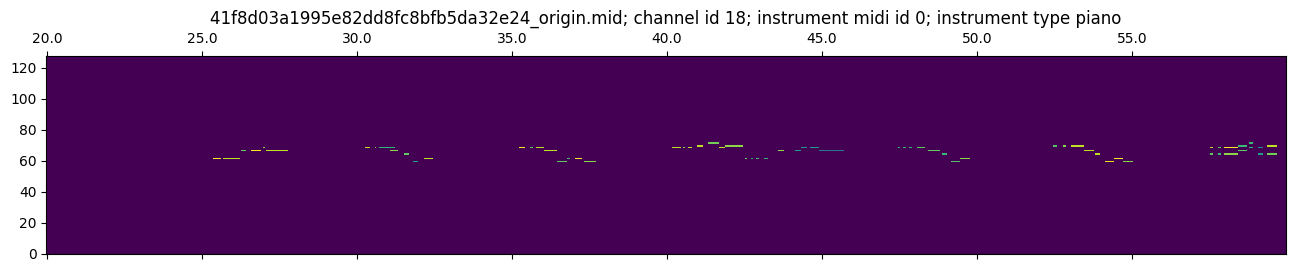

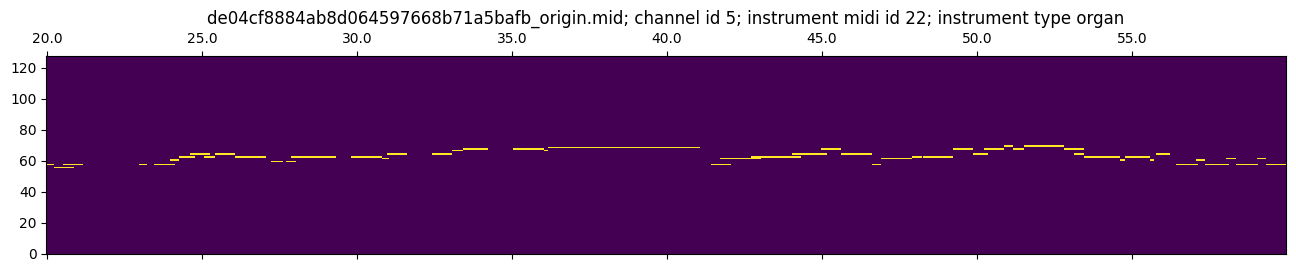

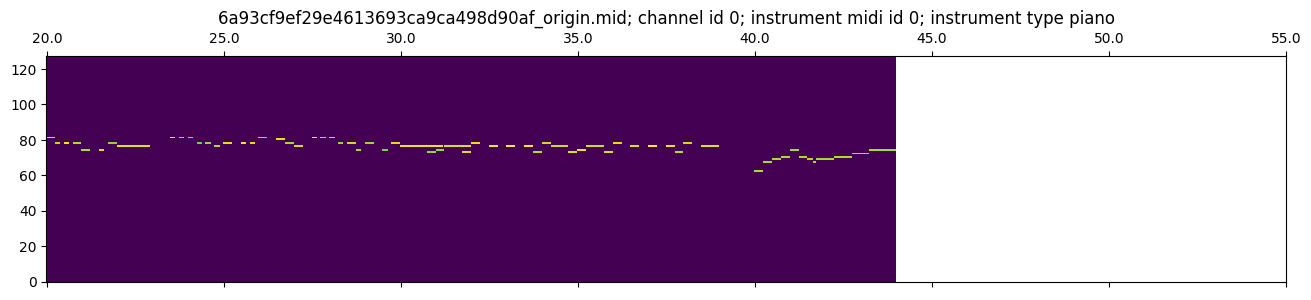

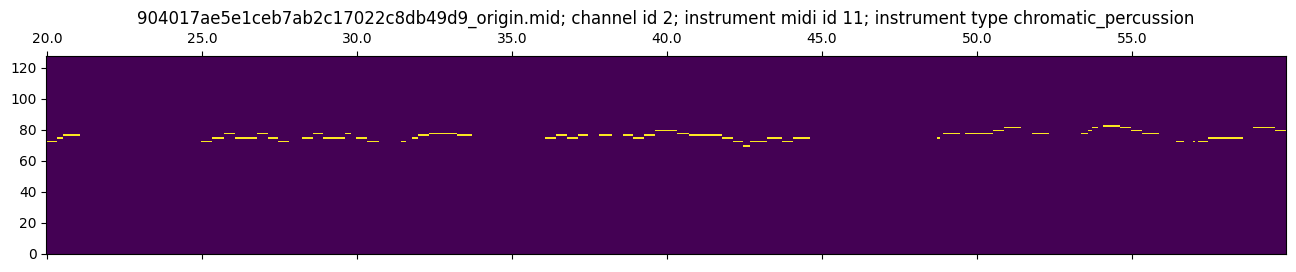

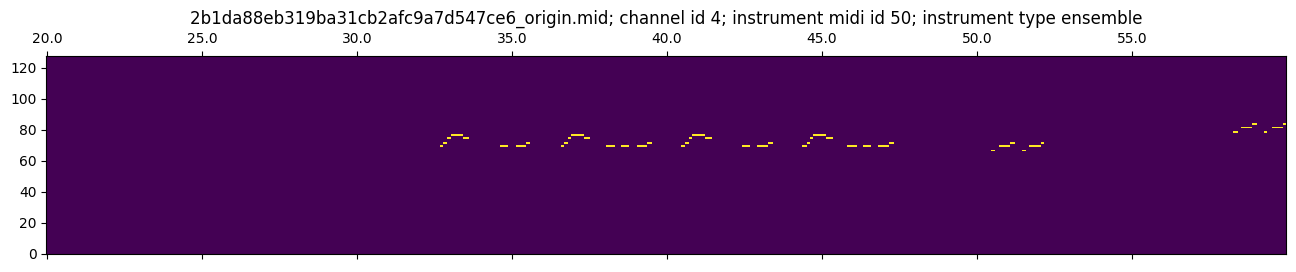

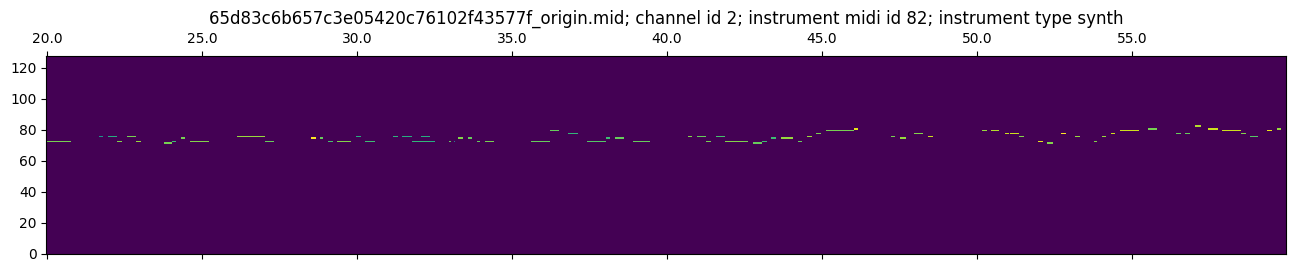

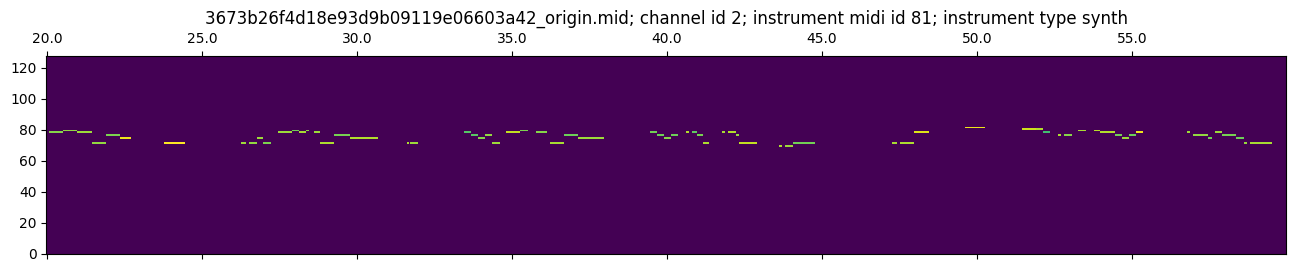

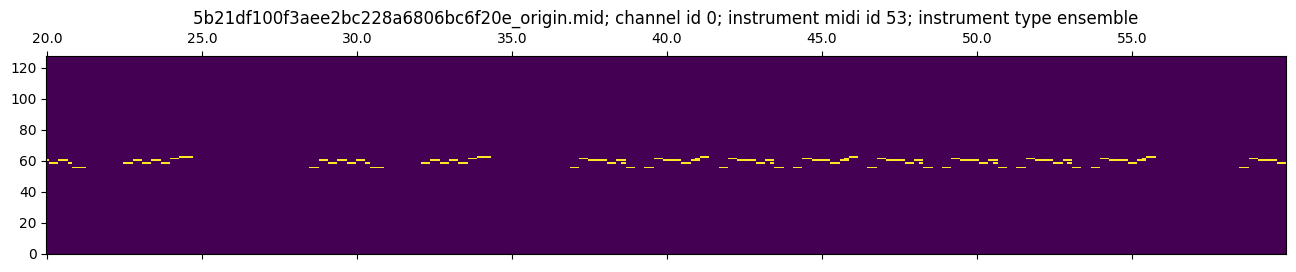

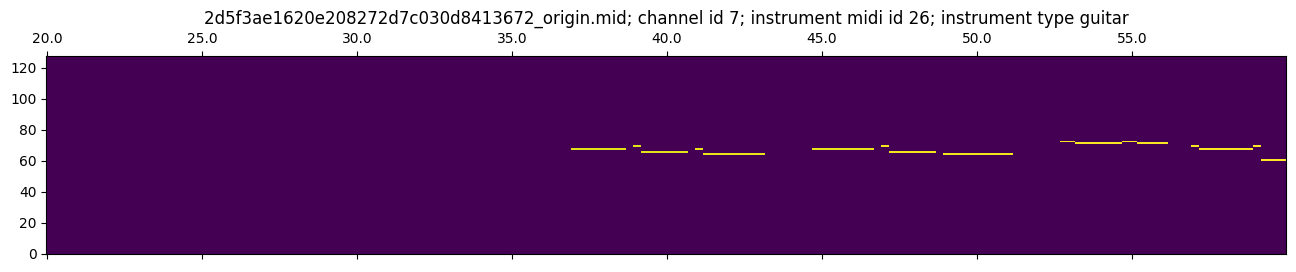

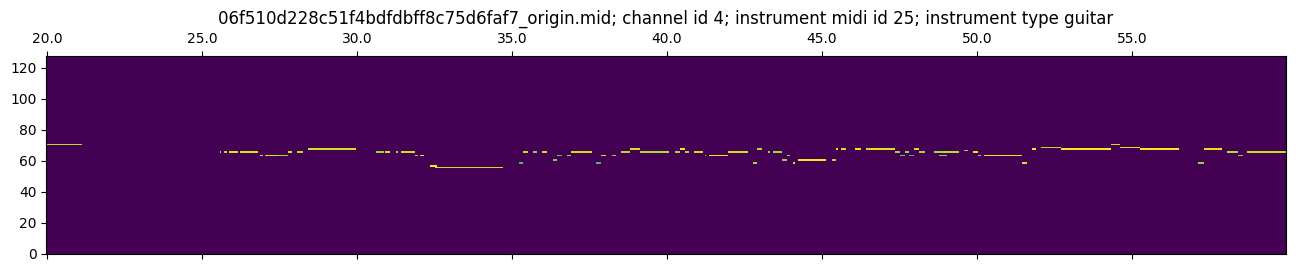

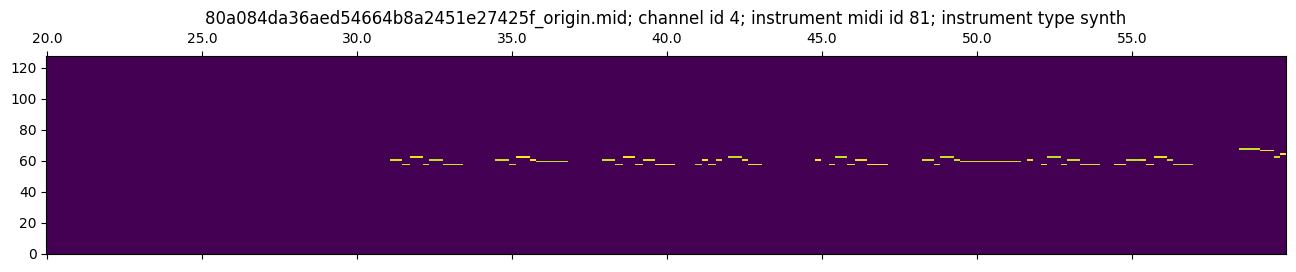

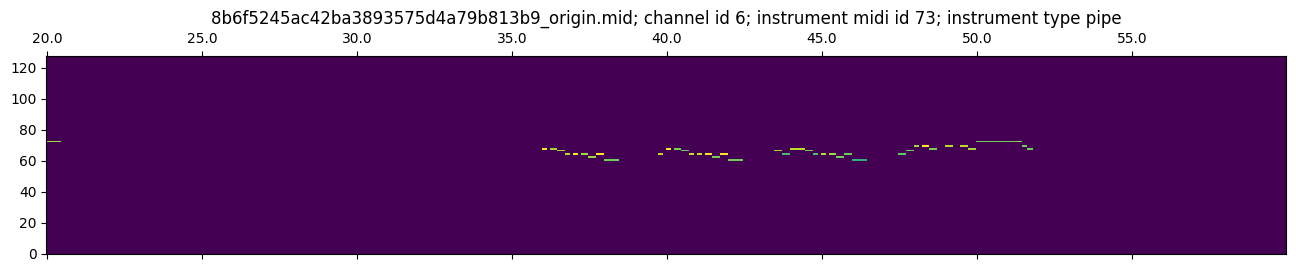

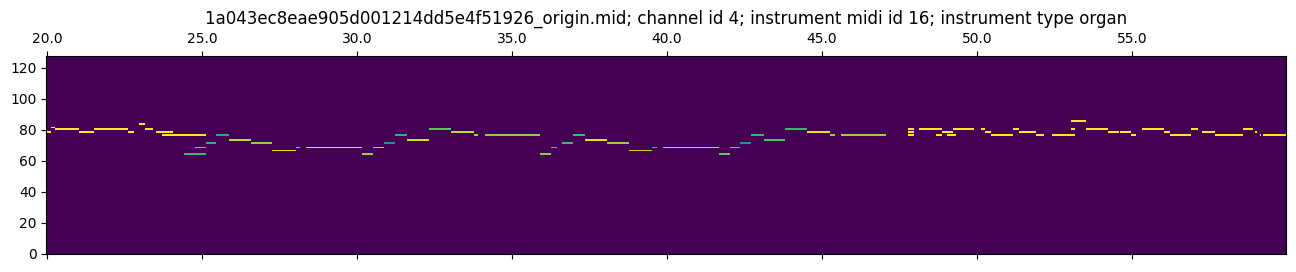

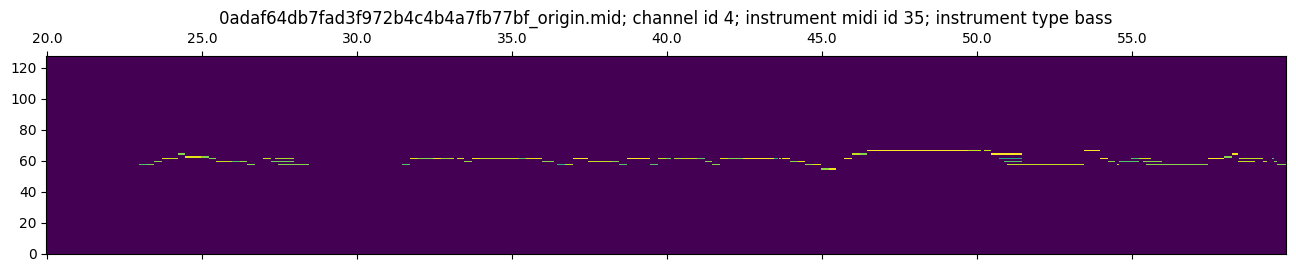

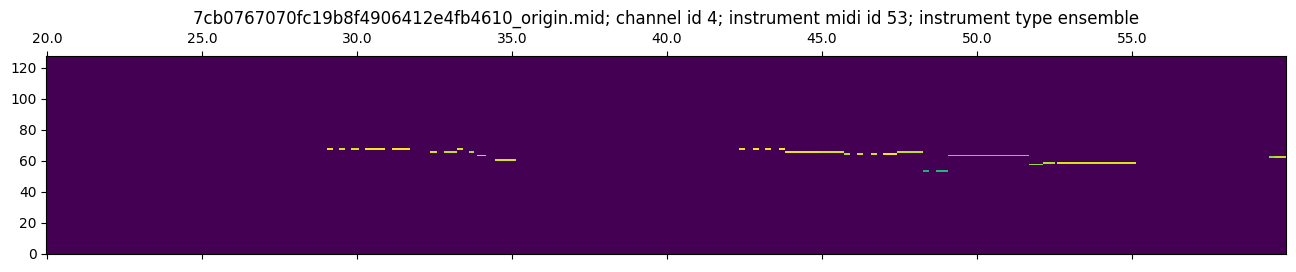

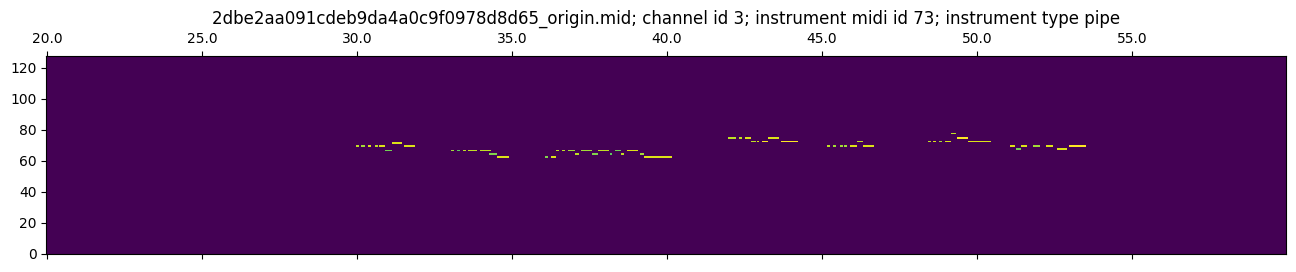

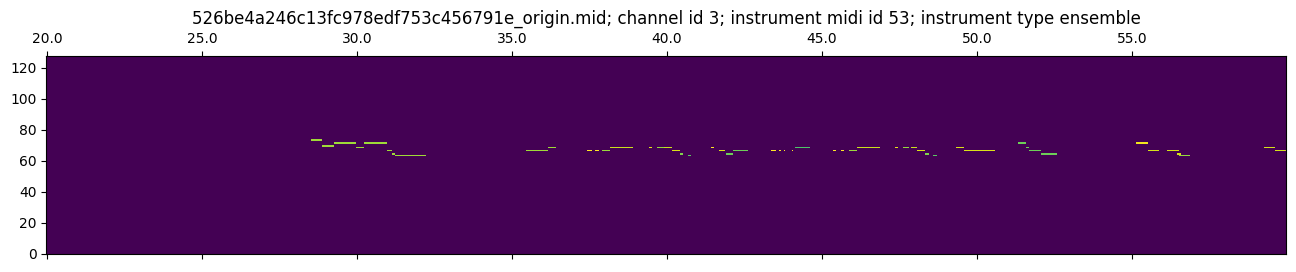

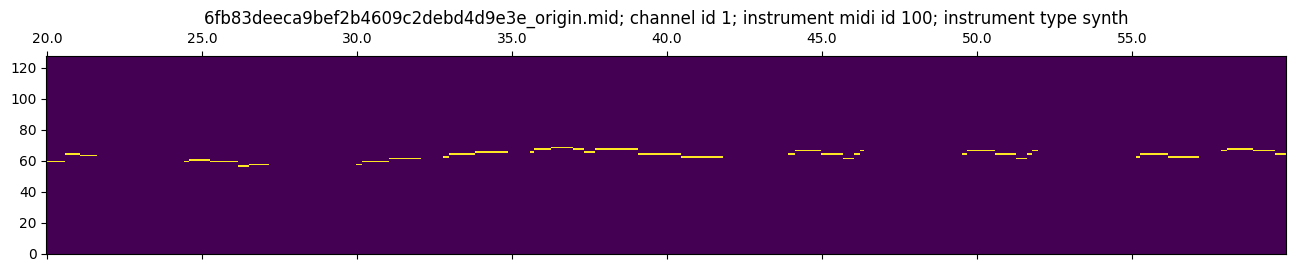

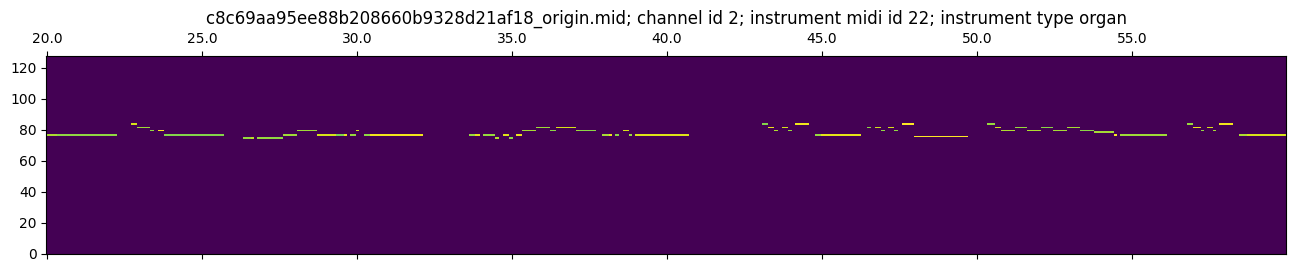

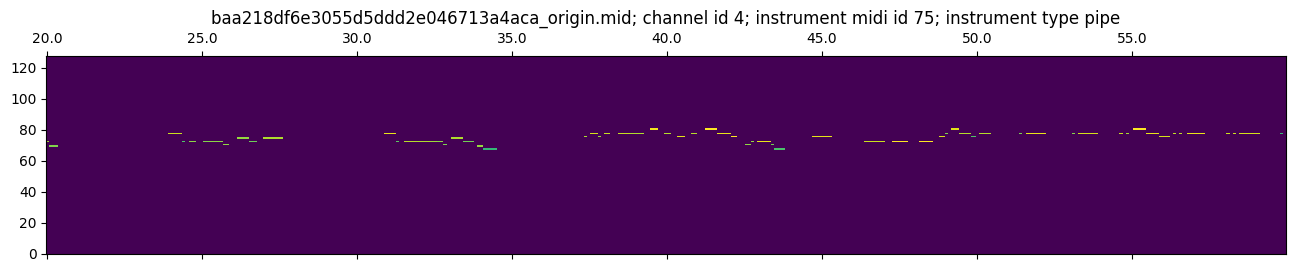

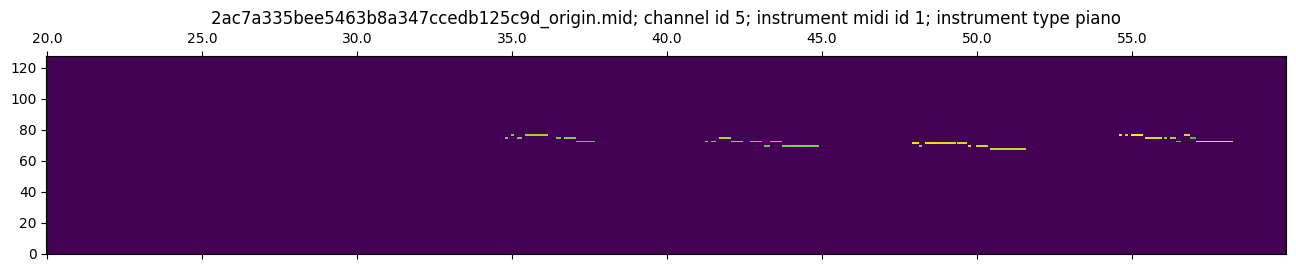

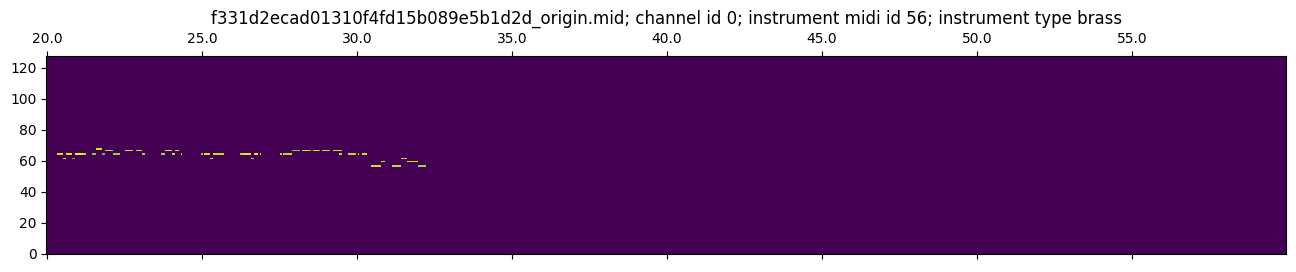

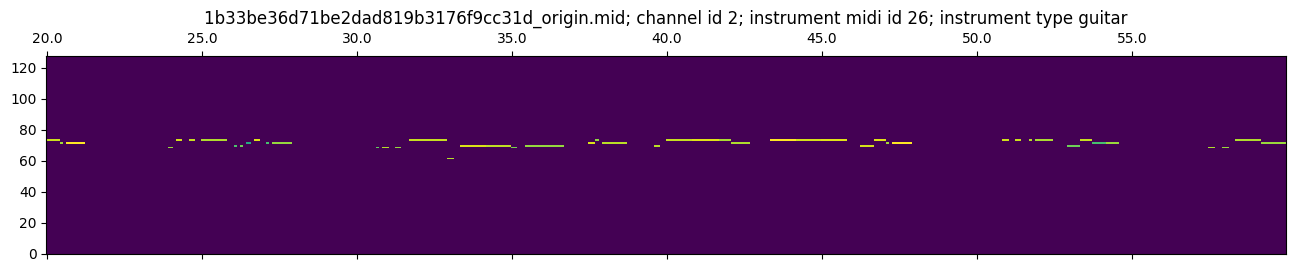

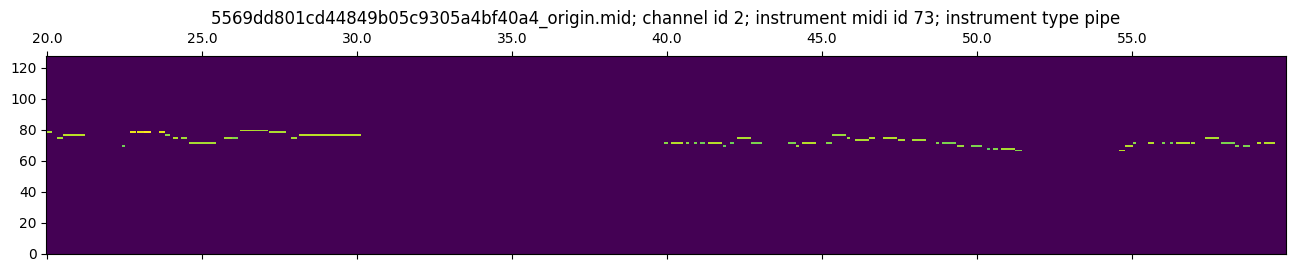

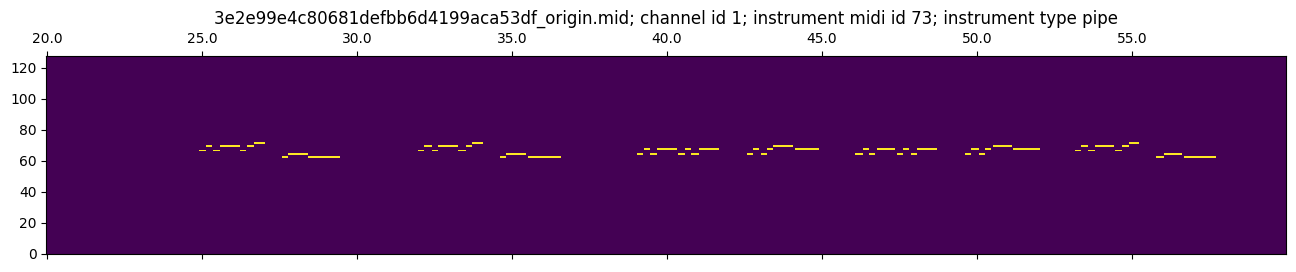

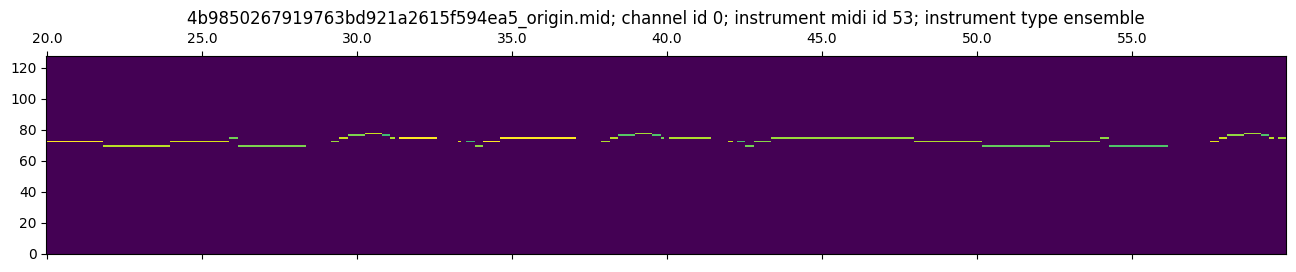

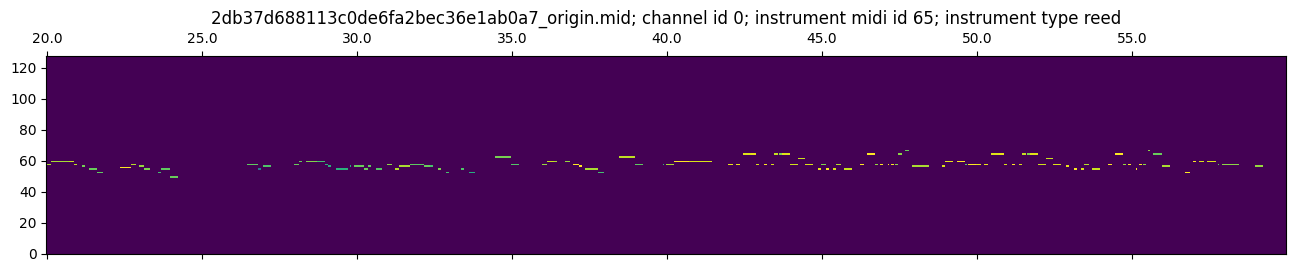

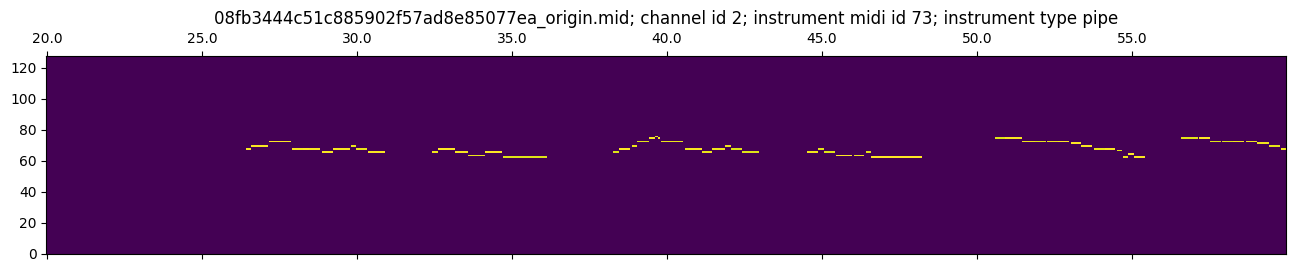

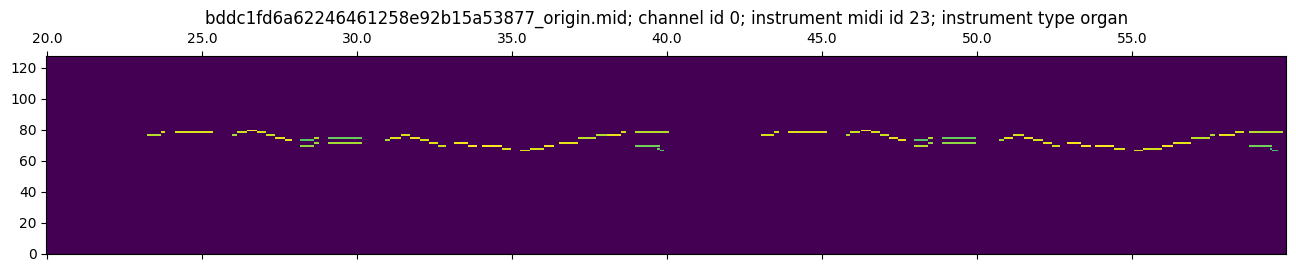

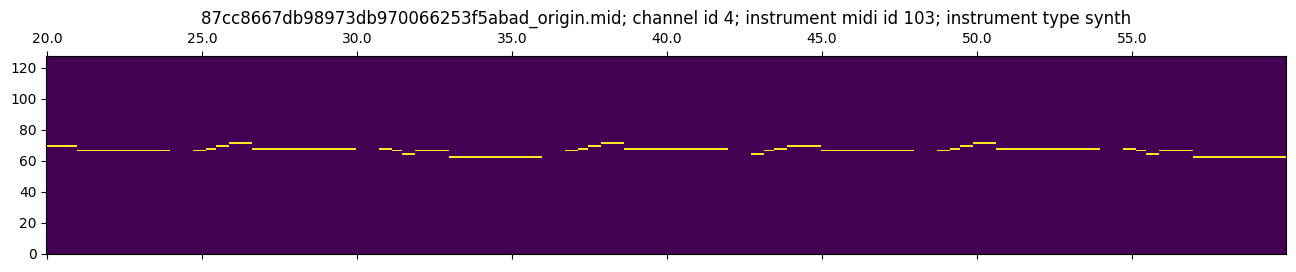

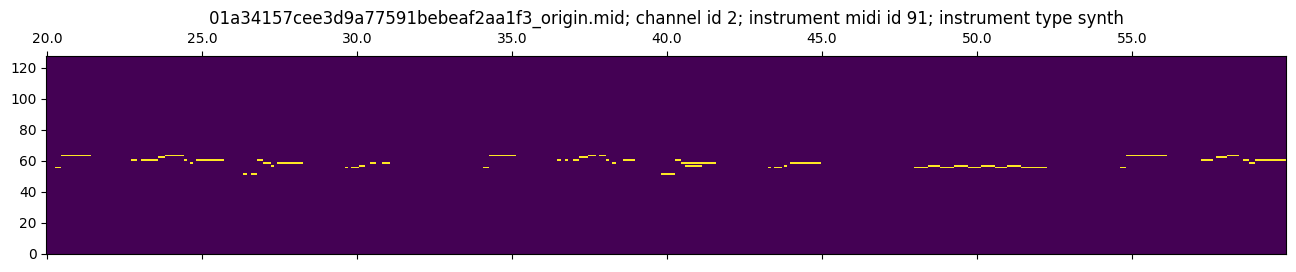

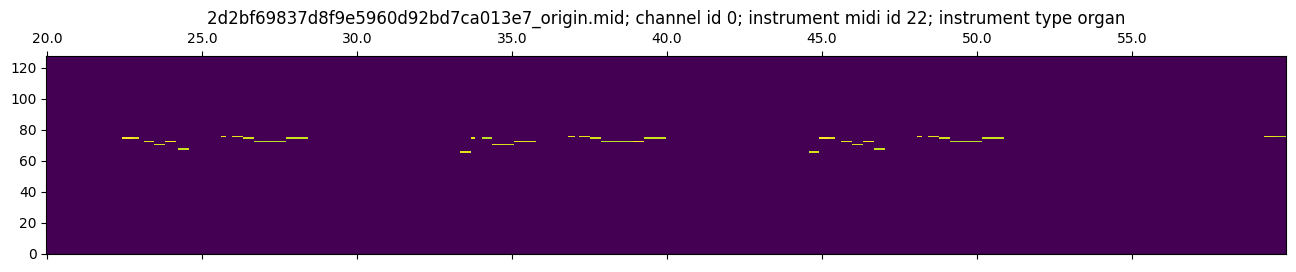

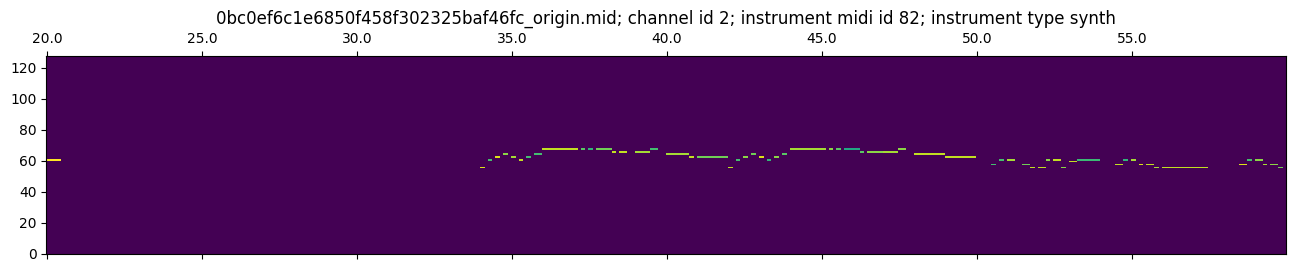

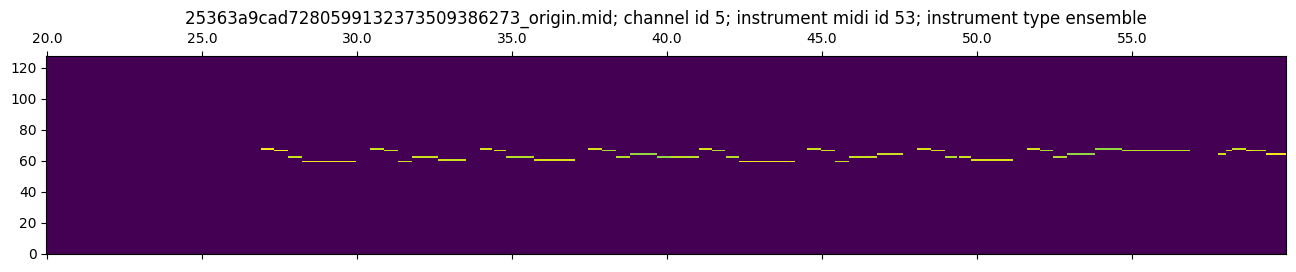

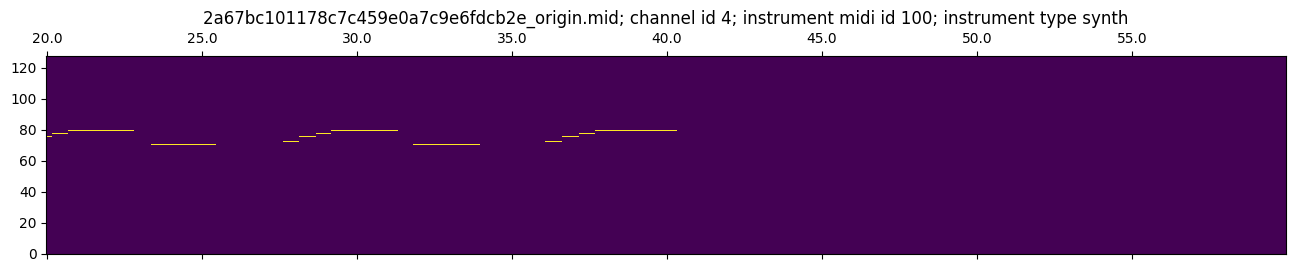

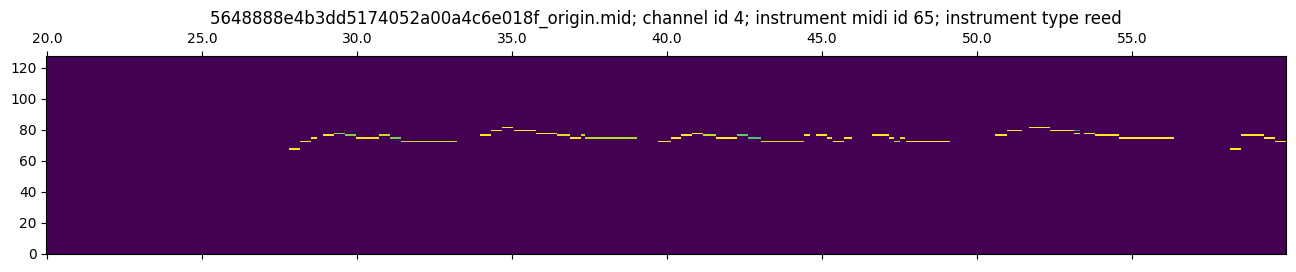

In [4]:
verify_channel_validity_by_demo("melody_channel_ids_new.txt", "dataset_cmu_melody/train")

The melody channel given in dataset_cmu_melody/train/melody_label.txt is invlid for midi file 2a3d11f15a232d9f68178c7e902c45dd_origin.mid
The melody channel given in dataset_cmu_melody/train/melody_label.txt is insufficient for midi file 8b6f5245ac42ba3893575d4a79b813b9_origin.mid
The melody channel given in dataset_cmu_melody/train/melody_label.txt is invlid for midi file 0adaf64db7fad3f972b4c4b4a7fb77bf_origin.mid
The melody channel given in dataset_cmu_melody/train/melody_label.txt is invlid for midi file 25363a9cad7280599132373509386273_origin.mid
The melody channel given in dataset_cmu_melody/train/melody_label.txt is invlid for midi file 2a67bc101178c7c459e0a7c9e6fdcb2e_origin.mid


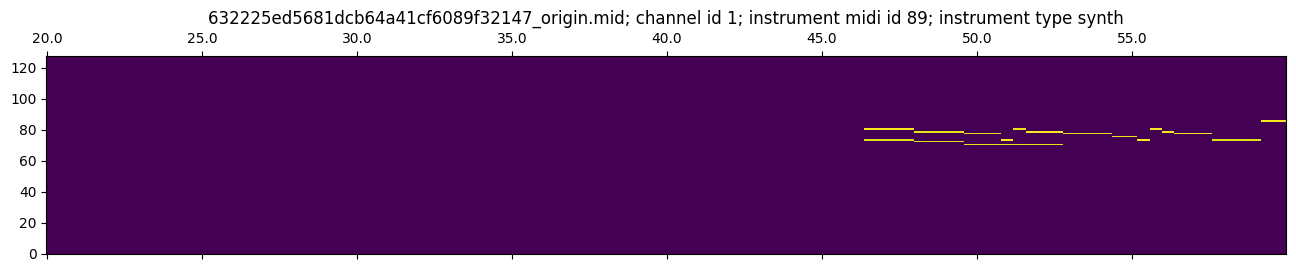

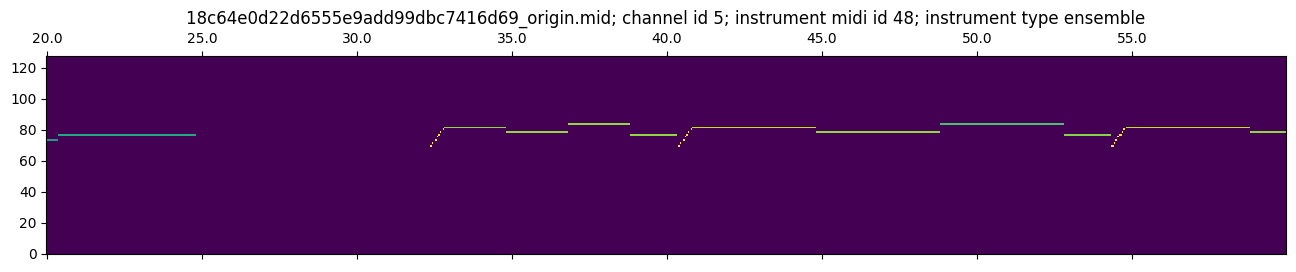

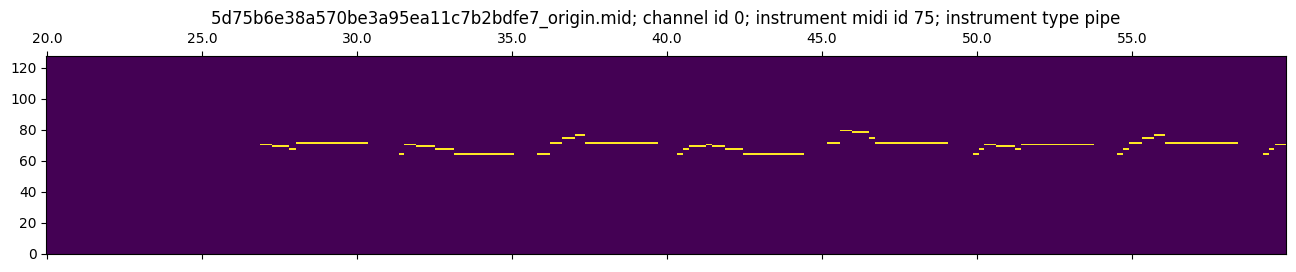

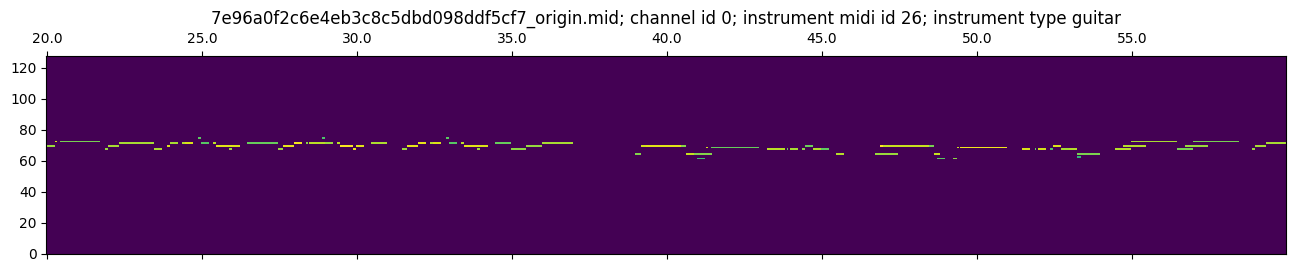

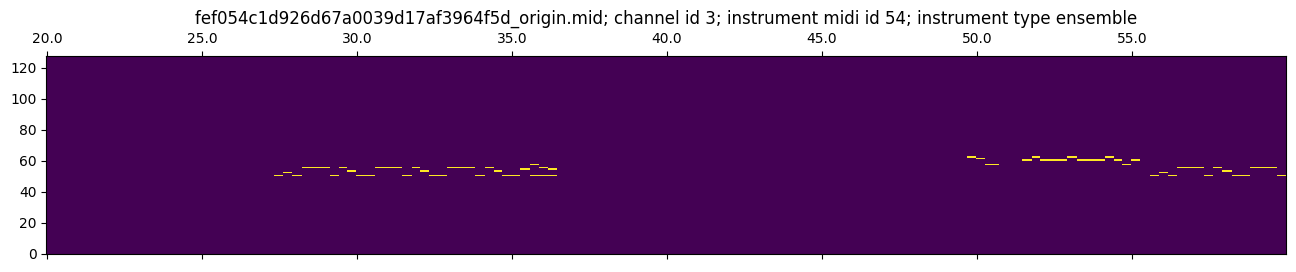

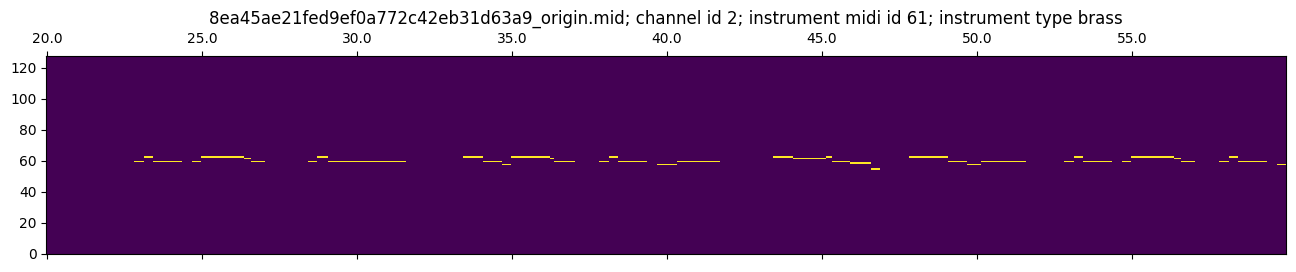

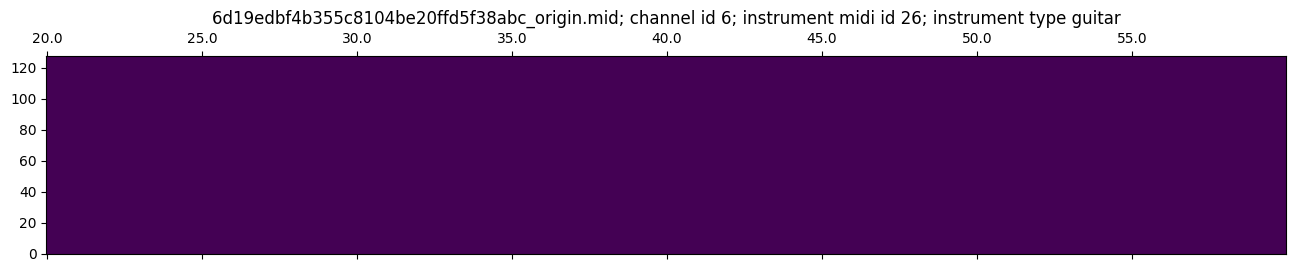

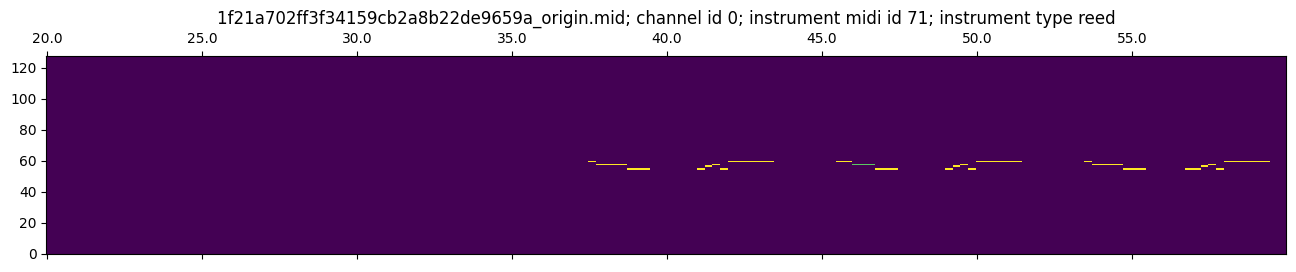

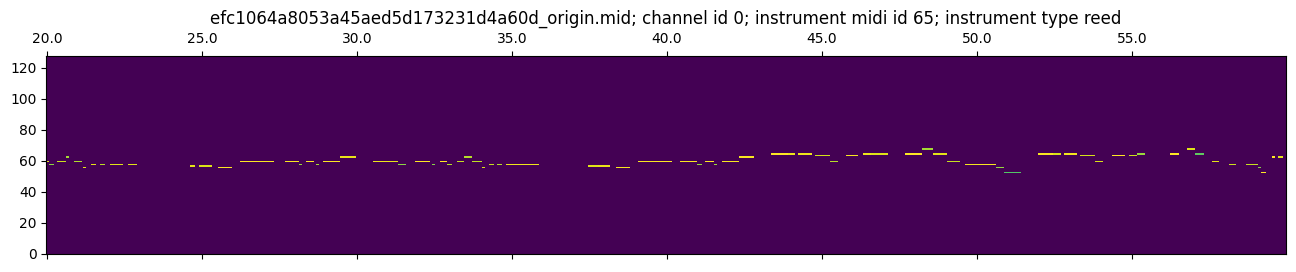

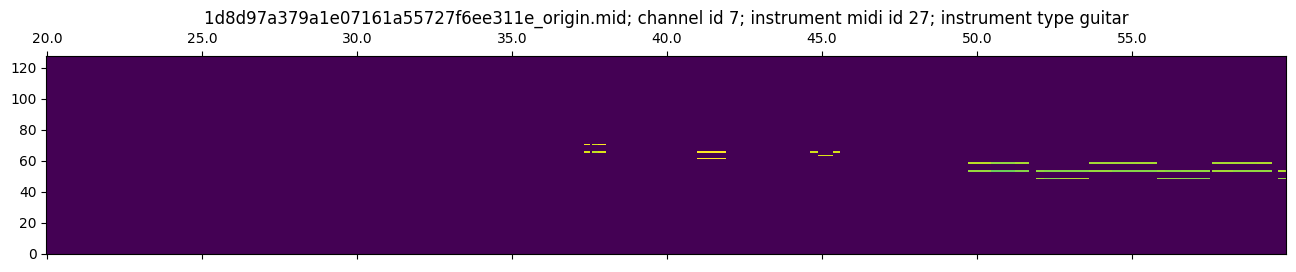

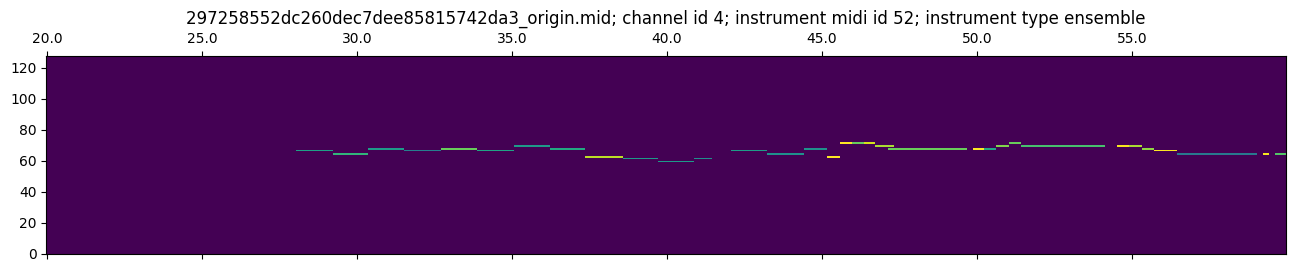

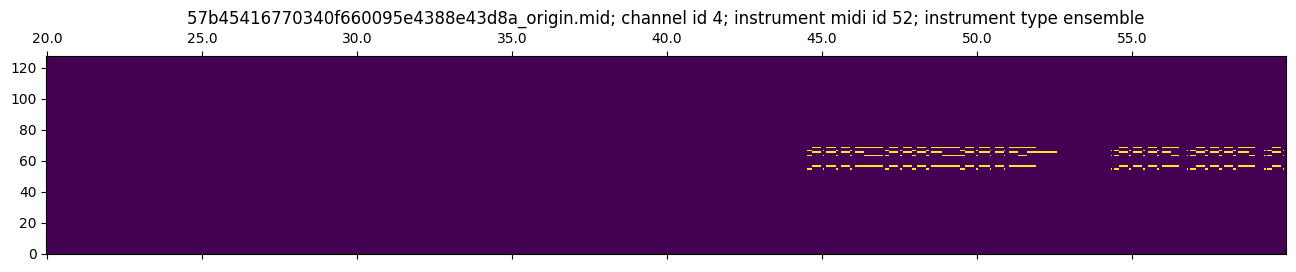

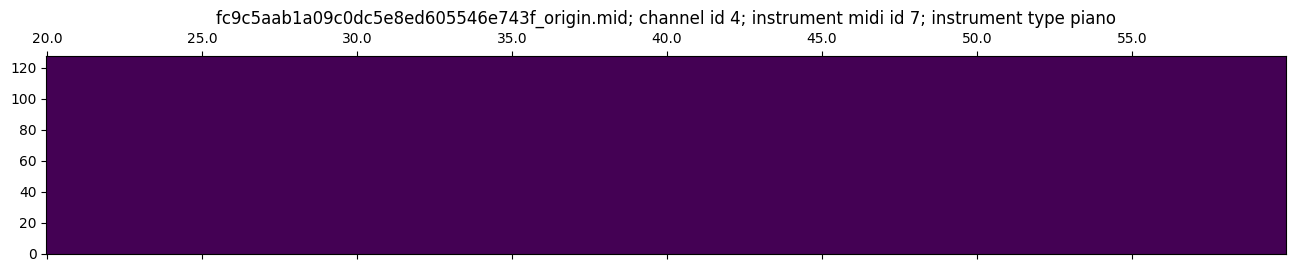

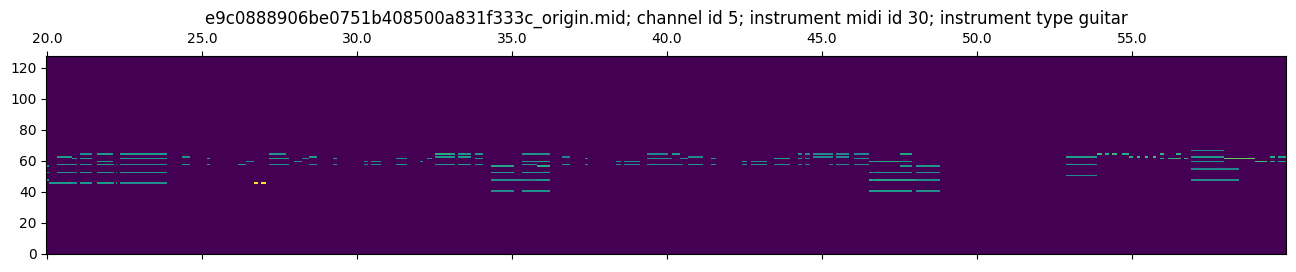

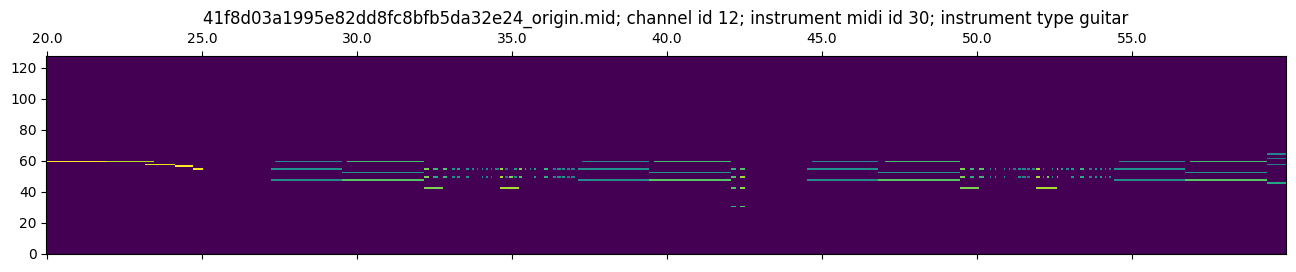

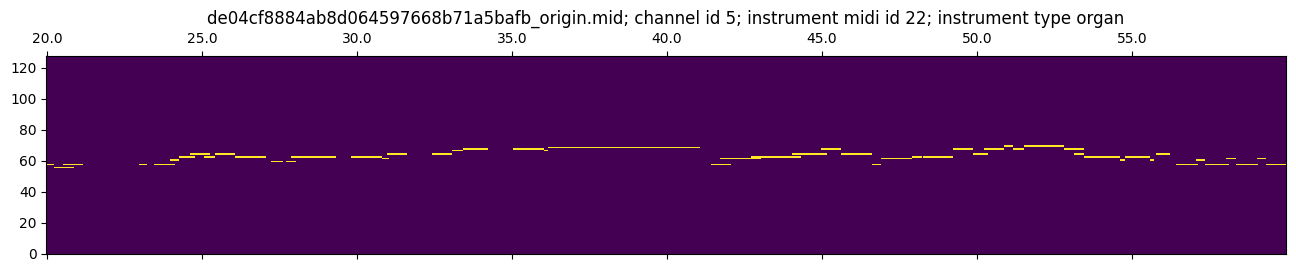

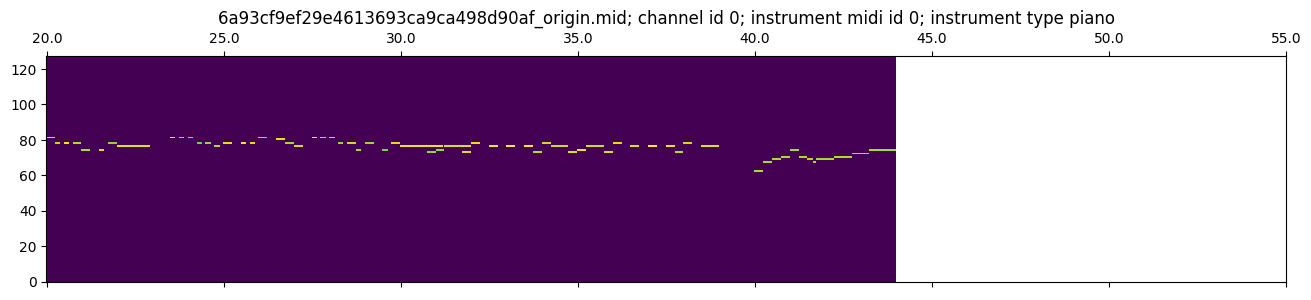

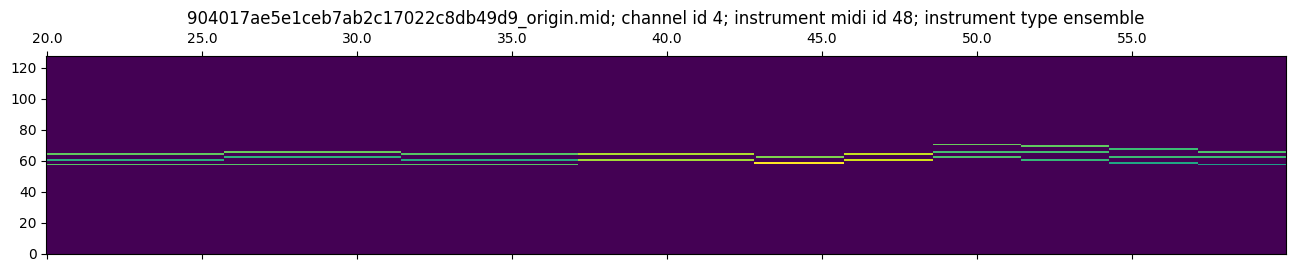

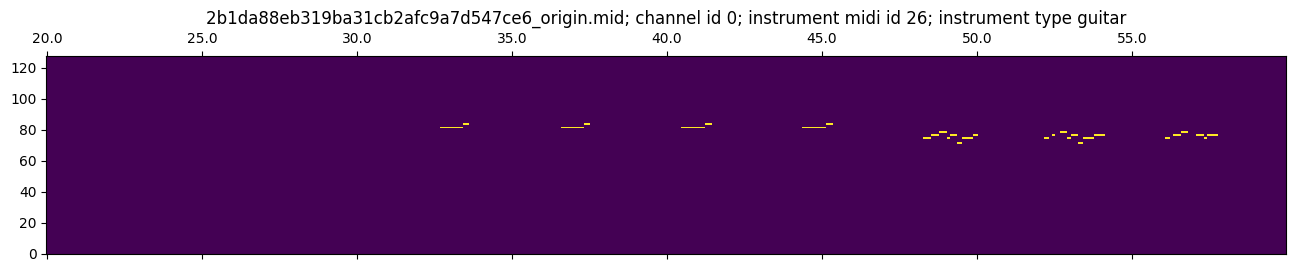

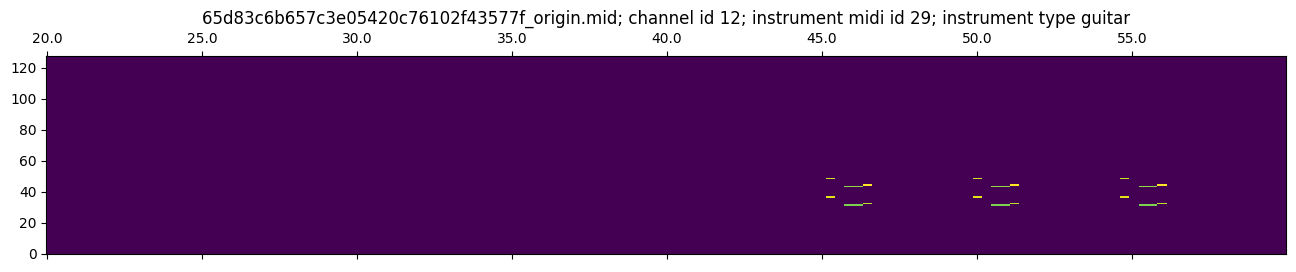

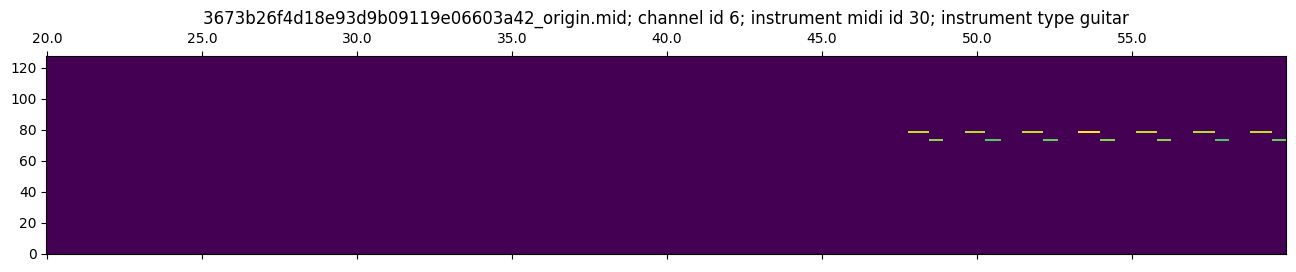

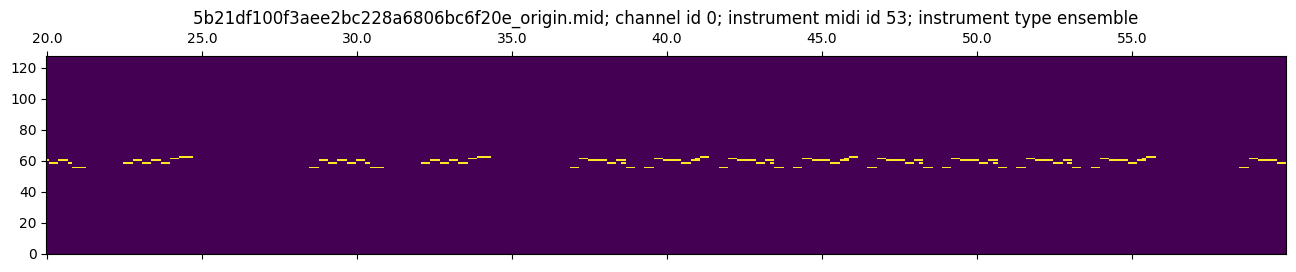

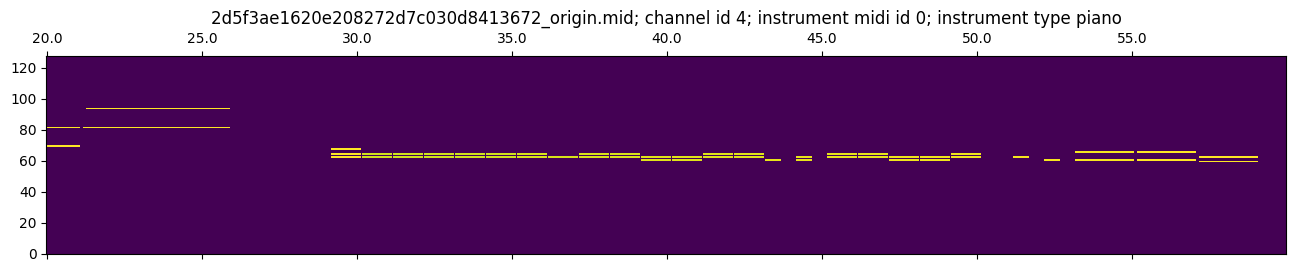

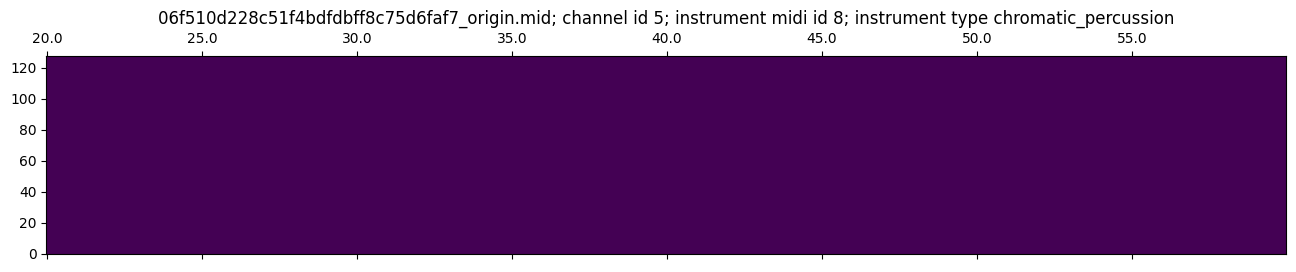

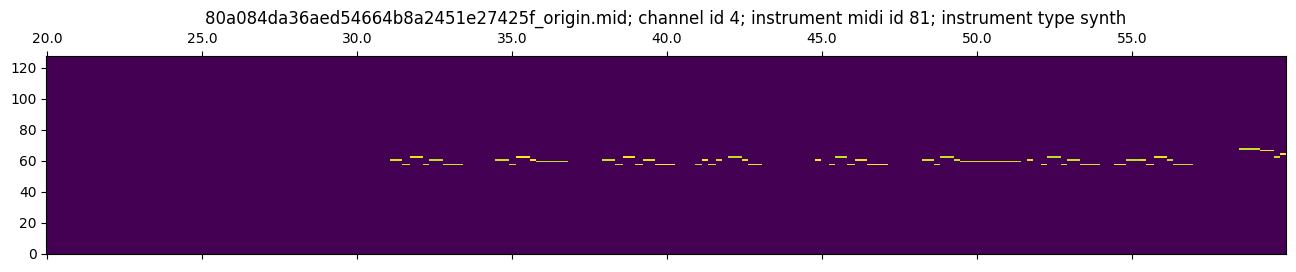

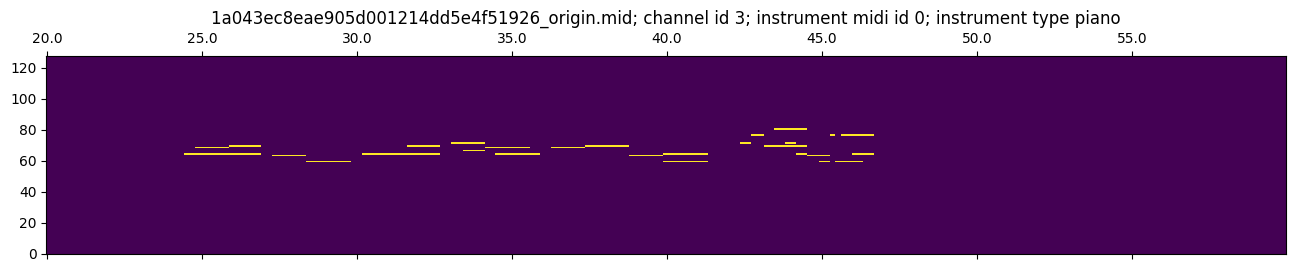

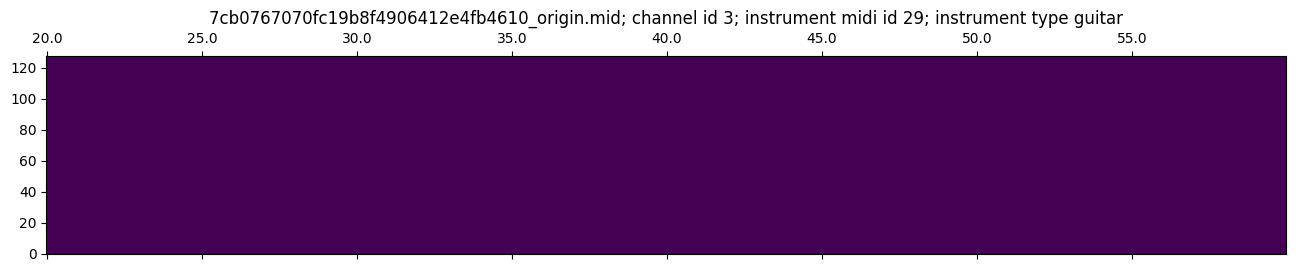

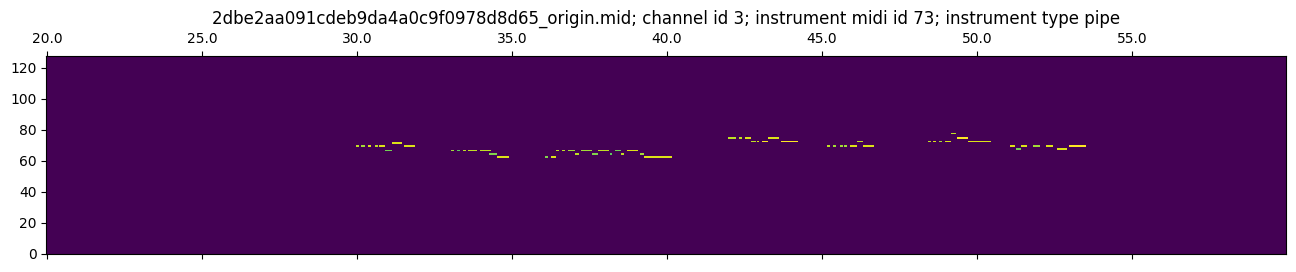

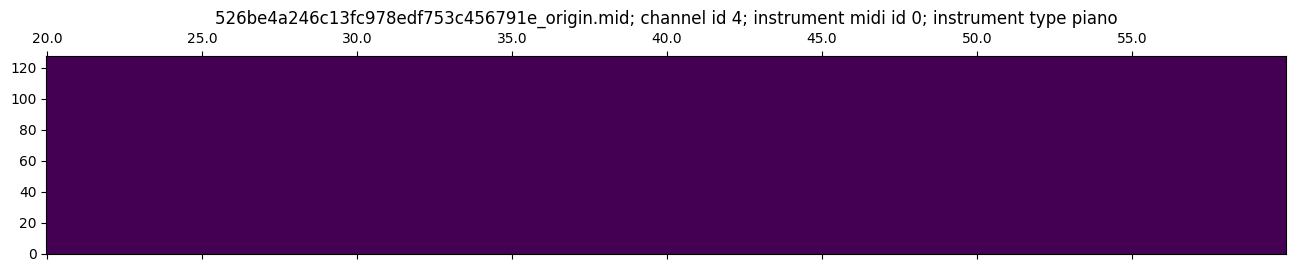

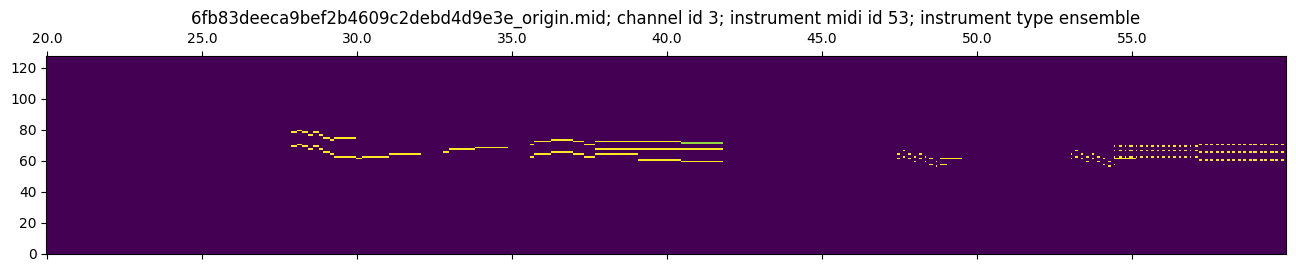

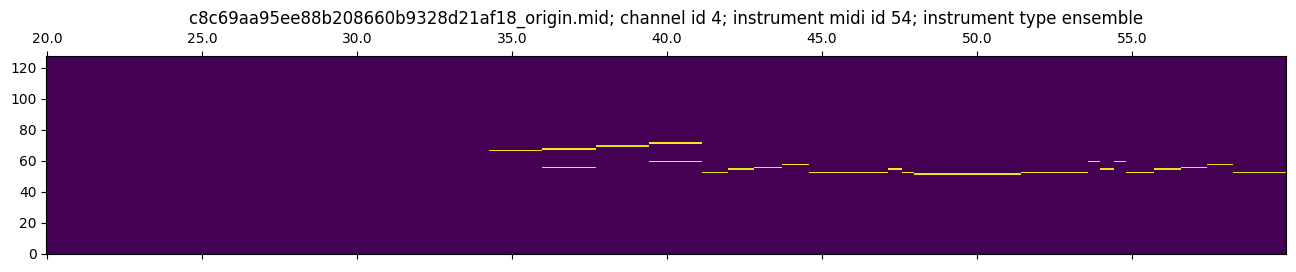

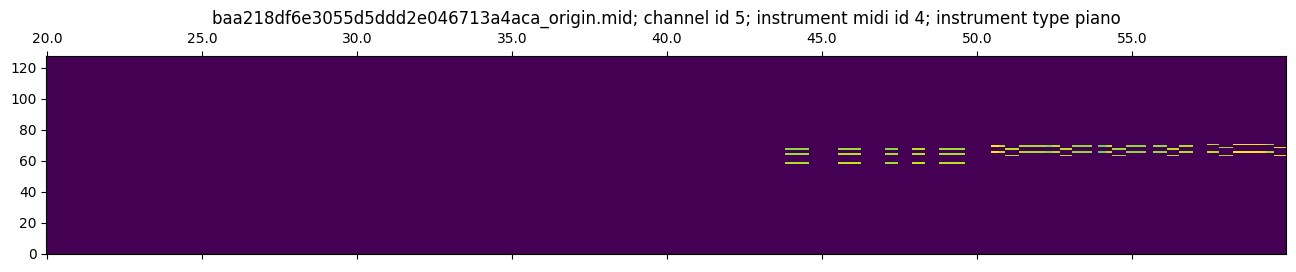

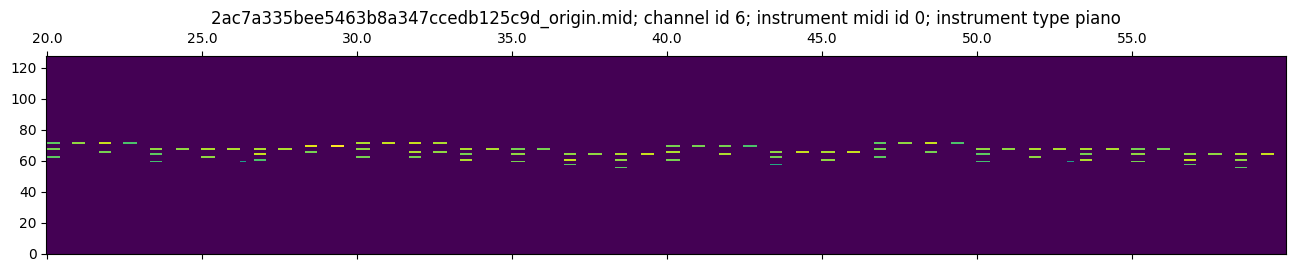

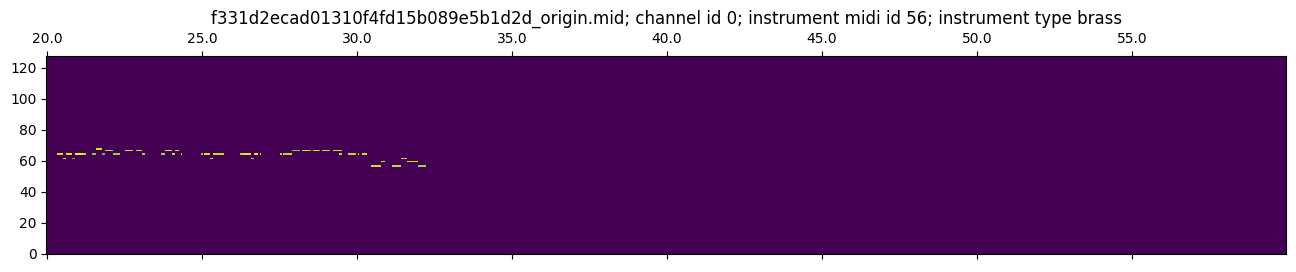

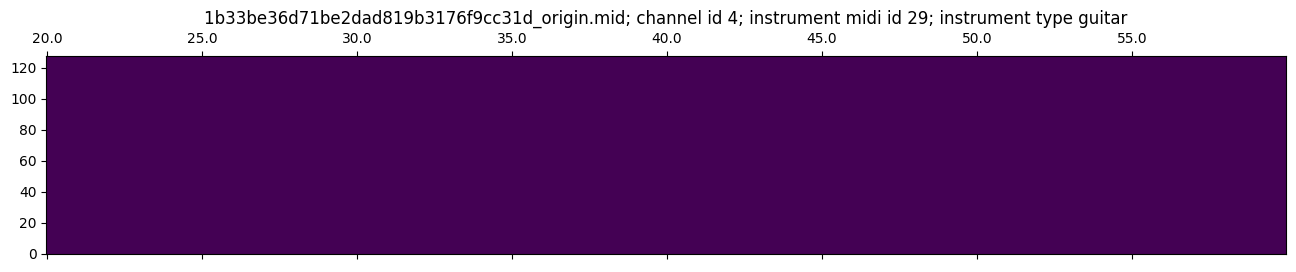

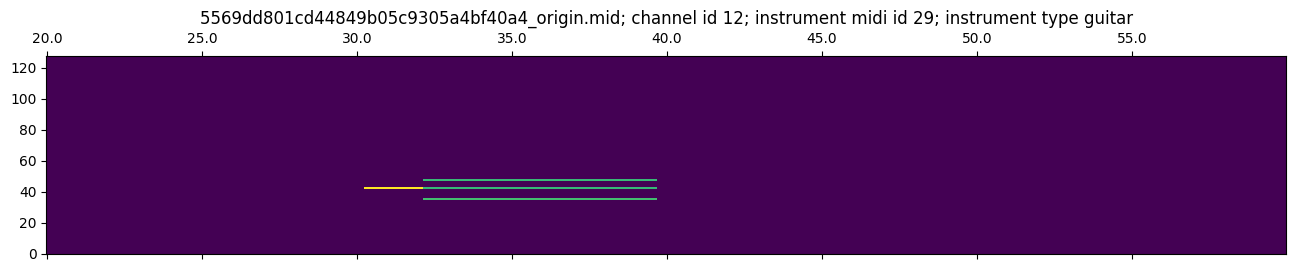

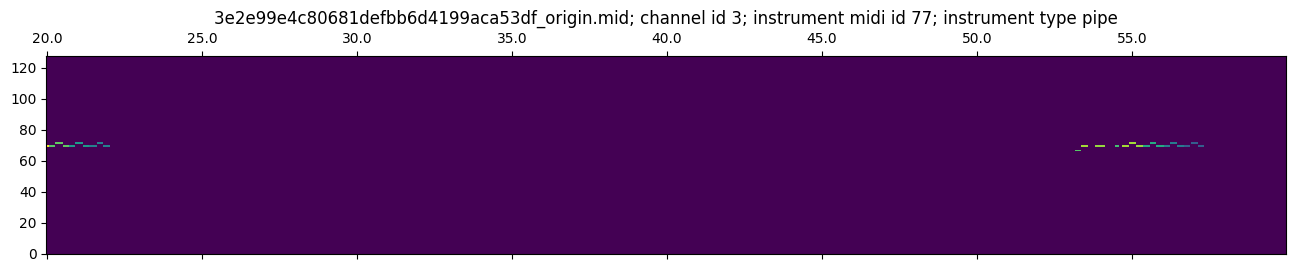

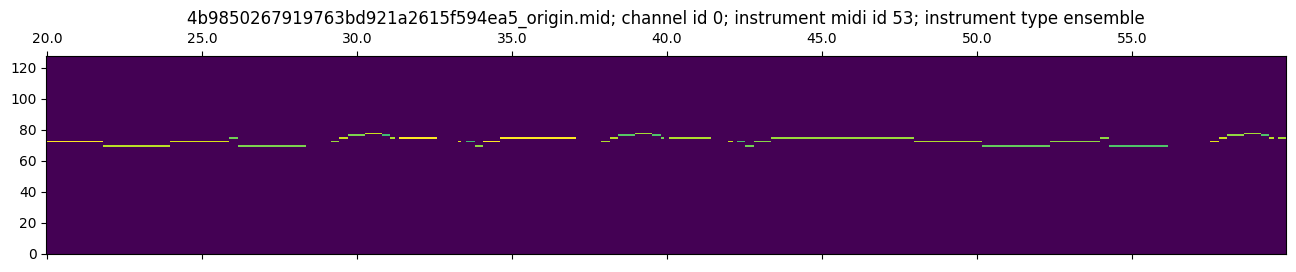

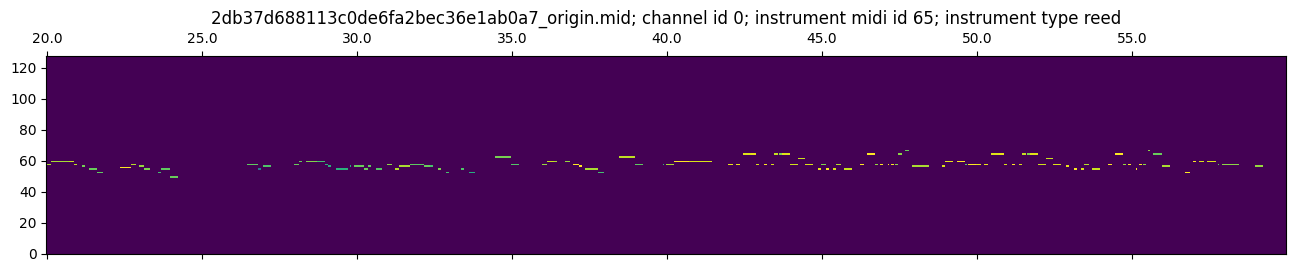

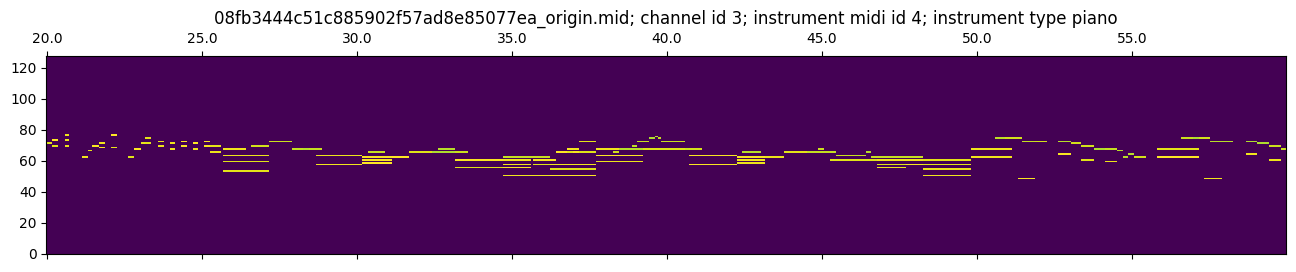

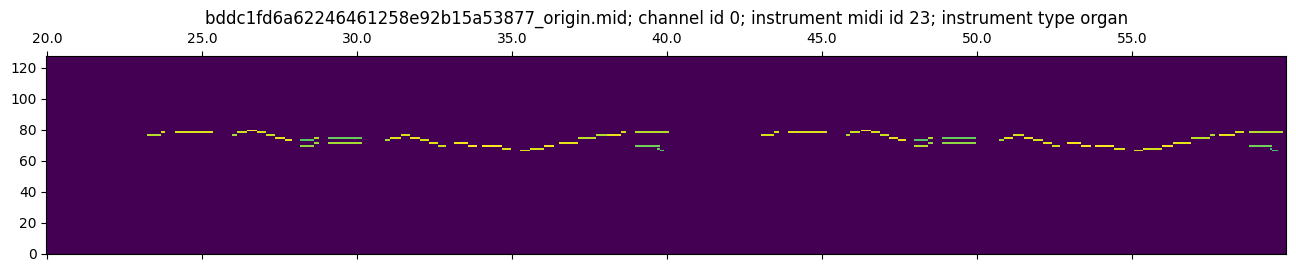

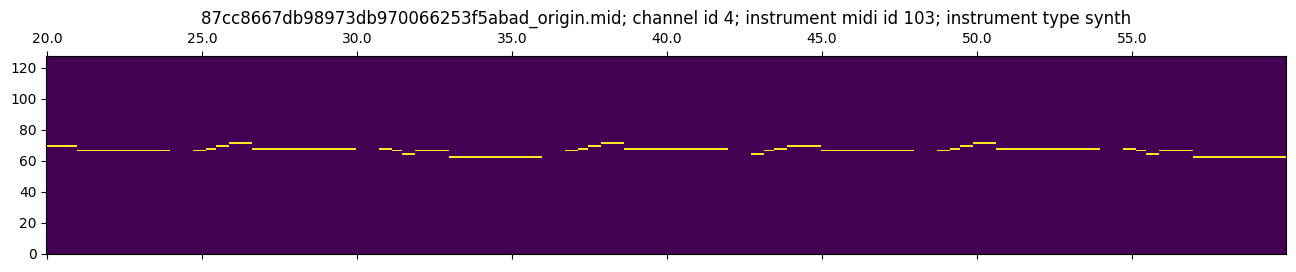

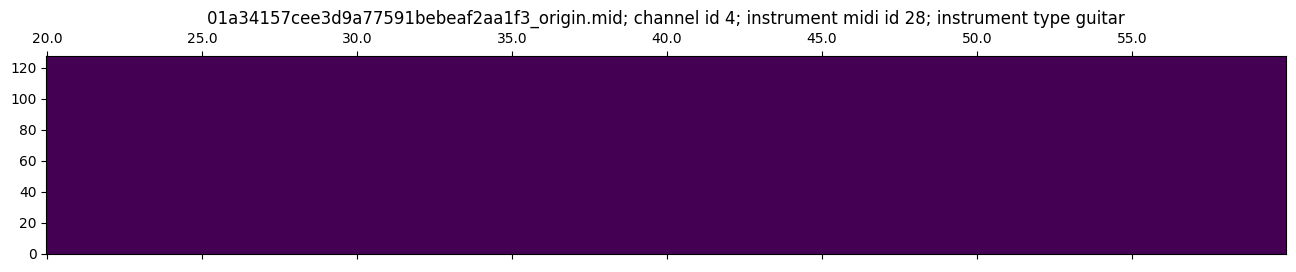

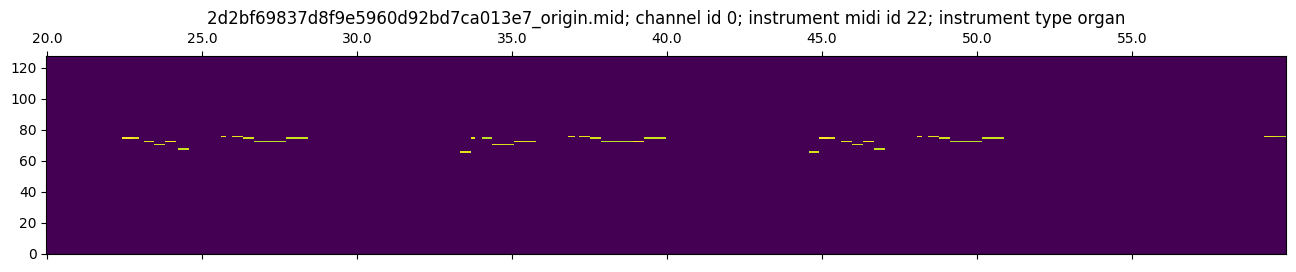

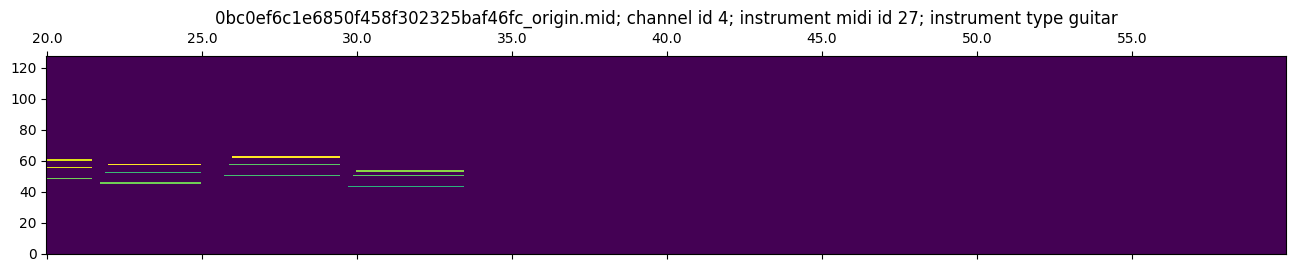

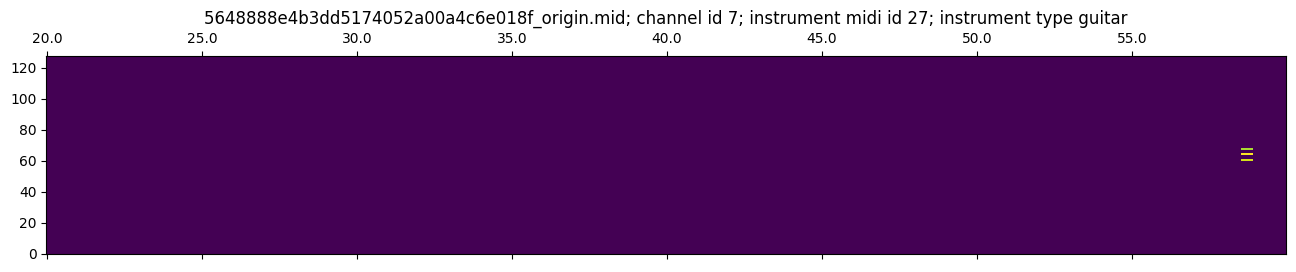

In [5]:
verify_channel_validity_by_demo("dataset_cmu_melody/train/melody_label.txt", "dataset_cmu_melody/train")